In [ ]:
# !pip install folium

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import ShuffleSplit

In [27]:
data_path = "C:\\Users\\DKici\\Documents\\Projects\\Competitor_Location\\data\\"
figures_path = "C:\\Users\\DKici\\Documents\\Projects\\Competitor_Location\\Figures\\"

In [28]:
df = pd.read_excel(f"{data_path}\\Location info collection.xlsx", header = 2, engine='openpyxl')

df.head(1)

,Brand,Location ID,Unnamed: 2,City,Province,Street Address,City population,Unnamed: 7,5 km radius population,Square Feet,...,Ikea,Home Sense,Winners/ Marshalls,Bed Bath & Beyond,Walmart,Grocery Store,Home Depot/Lowes/ Rona,Parking,Vehicle Traffic Counts (* denotes large nearby road),Visibility Rank (not necessarily the same road as traffic count)
0,AHS,74,Brentwood,Calgary,AB,510-3630 Brentwood Rd NW,1305550,L,165048.0,22981.0,...,18.9,0,0,1,0,1,0,poor parking situation,77000.0,4.0


In [29]:
df =df[df["Brand"]=='AHS']
df.head()

,Brand,Location ID,Unnamed: 2,City,Province,Street Address,City population,Unnamed: 7,5 km radius population,Square Feet,...,Ikea,Home Sense,Winners/ Marshalls,Bed Bath & Beyond,Walmart,Grocery Store,Home Depot/Lowes/ Rona,Parking,Vehicle Traffic Counts (* denotes large nearby road),Visibility Rank (not necessarily the same road as traffic count)
0,AHS,74,Brentwood,Calgary,AB,510-3630 Brentwood Rd NW,1305550,L,165048.0,22981.0,...,18.9,0,0,1,0,1,0,poor parking situation,77000.0,4.0
1,AHS,77,Saskatoon,Saskatoon,SK,140-3047 Clarence Ave S,264637,M,98822.0,22171.0,...,776.0,1,0,0,1,0,1,believe ok,9100.0,3.0
2,AHS,78,Calgary North,Calgary,AB,901 64 Ave NE,1305550,L,90045.0,24266.0,...,19.9,0,1,0,1,0,0,tight for spots,35000.0,3.0
3,AHS,79,Brandon,Brandon,MB,925 18th St N,50532,S,44624.0,21021.0,...,213.0,0,1,0,1,1,1,believe ok,23790.0,4.0
4,AHS,80,Winnipeg West,Winnipeg,MB,1000 St. James St,758515,L,198524.0,28326.0,...,6.8,0,0,0,0,0,0,"ok, but issues with Tims",21900.0,5.0


In [30]:
df.columns

Index(['Brand', 'Location ID', 'Unnamed: 2', 'City', 'Province',
       'Street Address', 'City population', 'Unnamed: 7',
       '5 km radius population', 'Square Feet',
       'Total Occupancy PSF (2022 Budget)', 'Traffic (3/1/2021 - 3/1/2022)',
       'Traffic per 1000 (city population)', 'Traffic per 1000 (5 k)',
       'Max of traffic per 1000 (city and 5k)',
       'Sales - Written (3/1/2021 - 3/1/2022)', 'Sales per capita (city)',
       'Sales per capita (5K)', 'Brick', 'Leons', 'Structube', 'Sleep Country',
       'Urban Barn', 'Ikea', 'Home Sense', 'Winners/ Marshalls',
       'Bed Bath & Beyond', 'Walmart', 'Grocery Store',
       'Home Depot/Lowes/ Rona', 'Parking',
       'Vehicle Traffic Counts (* denotes large nearby road)',
       'Visibility Rank (not necessarily the same road as traffic count)'],
      dtype='object')

In [31]:
df = df.rename(columns ={'Unnamed: 2':'Region', 'Unnamed: 7': 'Size','5 km radius population':'pop_5km', 'Square Feet':'sq_ft',
                        'Total Occupancy PSF (2022 Budget)':'Tot_Occ_PSF_22_budg', 'Traffic (3/1/2021 - 3/1/2022)': 'Traf_21_22',
                          'Traffic per 1000 (city population)': 'Traf_1K_cty_pop', 'Traffic per 1000 (5 k)':'Traf_1K_5k',
                         'Max of traffic per 1000 (city and 5k)':'Max_Traf_1K_cty_5k',
                          'Sales - Written (3/1/2021 - 3/1/2022)':'Sal_21_22',
                         'Sales per capita (city)':'Sal_capita_cty', 'Sales per capita (5K)':'Sal_capita_5K', 
                         'Brick':'D_Brick', 'Leons':'D_Leons', 
                    'Structube':'D_Structube', 'Sleep Country':'D_Sleep_Country', 'Urban Barn':'D_Urban_Barn',
                    'Ikea':'D_Ikea', 'Home Sense':'C_Home_Sense', 'Winners/ Marshalls':'C_Win_Mar',
       'Bed Bath & Beyond':'C_BBB', 'Walmart':'C_Walmart', 'Grocery Store':'C_GrosStore',
       'Home Depot/Lowes/ Rona':'C_HomeDepo'})

In [32]:
df.columns

Index(['Brand', 'Location ID', 'Region', 'City', 'Province', 'Street Address',
       'City population', 'Size', 'pop_5km', 'sq_ft', 'Tot_Occ_PSF_22_budg',
       'Traf_21_22', 'Traf_1K_cty_pop', 'Traf_1K_5k', 'Max_Traf_1K_cty_5k',
       'Sal_21_22', 'Sal_capita_cty', 'Sal_capita_5K', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea',
       'C_Home_Sense', 'C_Win_Mar', 'C_BBB', 'C_Walmart', 'C_GrosStore',
       'C_HomeDepo', 'Parking',
       'Vehicle Traffic Counts (* denotes large nearby road)',
       'Visibility Rank (not necessarily the same road as traffic count)'],
      dtype='object')

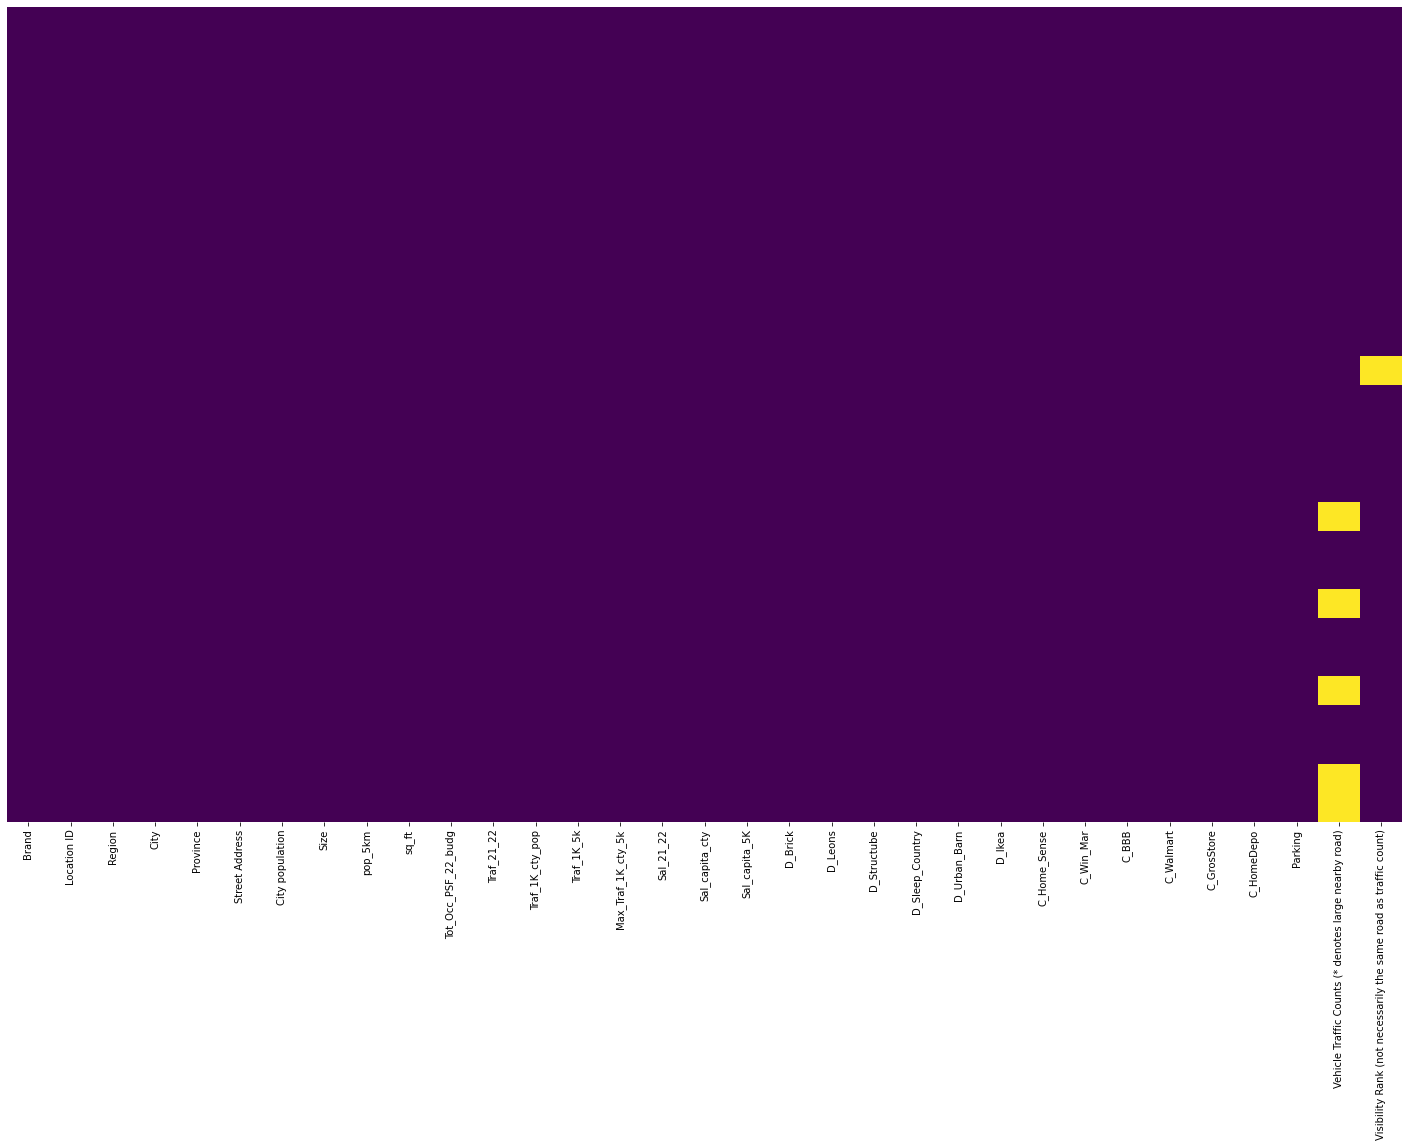

In [33]:
fig, ax = plt.subplots(figsize=(25,15))  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

plt.savefig(f'{figures_path}Location_info_collection_Scarcity.png')

In [34]:
df.Parking.unique()

array(['poor parking situation', 'believe ok', 'tight for spots',
       'ok, but issues with Tims', 'tight', 'good - ok', 'can be tight',
       'good  ', 'ok ', 'good', 'ok', 'decent but shared',
       'could be light', 'limited but no known issues'], dtype=object)

In [35]:
my_df = df.iloc[:,:-3]
my_df.head(1)

,Brand,Location ID,Region,City,Province,Street Address,City population,Size,pop_5km,sq_ft,...,D_Structube,D_Sleep_Country,D_Urban_Barn,D_Ikea,C_Home_Sense,C_Win_Mar,C_BBB,C_Walmart,C_GrosStore,C_HomeDepo
0,AHS,74,Brentwood,Calgary,AB,510-3630 Brentwood Rd NW,1305550,L,165048.0,22981.0,...,8.7,0.1,8.4,18.9,0,0,1,0,1,0


In [36]:
# my_df = df.dropna()

<AxesSubplot:>

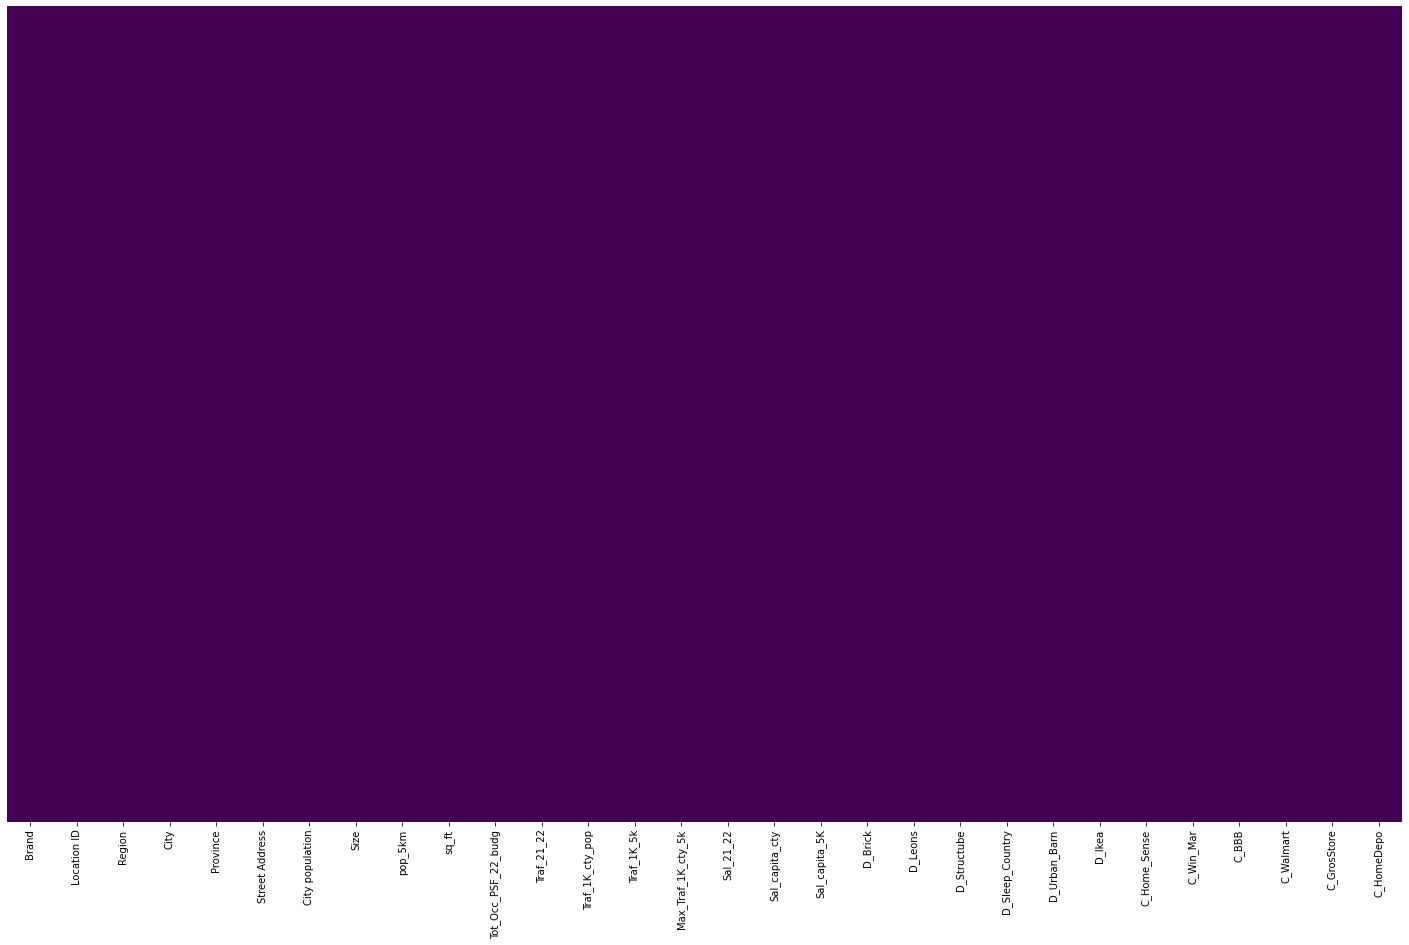

In [37]:
fig, ax = plt.subplots(figsize=(25,15))  
sns.heatmap(my_df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

In [38]:
my_df = my_df.drop(["Location ID","Street Address"], axis=1)
my_df.head()

,Brand,Region,City,Province,City population,Size,pop_5km,sq_ft,Tot_Occ_PSF_22_budg,Traf_21_22,...,D_Structube,D_Sleep_Country,D_Urban_Barn,D_Ikea,C_Home_Sense,C_Win_Mar,C_BBB,C_Walmart,C_GrosStore,C_HomeDepo
0,AHS,Brentwood,Calgary,AB,1305550,L,165048.0,22981.0,36.811131,13564.5,...,8.7,0.1,8.4,18.9,0,0,1,0,1,0
1,AHS,Saskatoon,Saskatoon,SK,264637,M,98822.0,22171.0,32.618786,37281.5,...,776.0,0.4,0.6,776.0,1,0,0,1,0,1
2,AHS,Calgary North,Calgary,AB,1305550,L,90045.0,24266.0,43.155737,25116.5,...,0.1,0.1,7.4,19.9,0,1,0,1,0,0
3,AHS,Brandon,Brandon,MB,50532,S,44624.0,21021.0,29.746503,11799.0,...,213.0,0.5,214.0,213.0,0,1,0,1,1,1
4,AHS,Winnipeg West,Winnipeg,MB,758515,L,198524.0,28326.0,29.318626,27348.0,...,6.9,0.2,8.4,6.8,0,0,0,0,0,0


In [39]:
my_df.columns

Index(['Brand', 'Region', 'City', 'Province', 'City population', 'Size',
       'pop_5km', 'sq_ft', 'Tot_Occ_PSF_22_budg', 'Traf_21_22',
       'Traf_1K_cty_pop', 'Traf_1K_5k', 'Max_Traf_1K_cty_5k', 'Sal_21_22',
       'Sal_capita_cty', 'Sal_capita_5K', 'D_Brick', 'D_Leons', 'D_Structube',
       'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea', 'C_Home_Sense',
       'C_Win_Mar', 'C_BBB', 'C_Walmart', 'C_GrosStore', 'C_HomeDepo'],
      dtype='object')

In [40]:
# one hot encoding: Region, City, Province, Size, Parking, Cotentant_Home_Sense, Cotentant_WinMar, Cotentant_BBB,
#     Cotentant_Walmart, Cotentant_GS, Cotentant_HomeDepo

my_df = pd.get_dummies(my_df, columns=['Size', "Region","City","Province",'C_Home_Sense','C_Win_Mar', 'C_BBB', 'C_Walmart', 'C_GrosStore', 'C_HomeDepo'])

my_df

,Brand,City population,pop_5km,sq_ft,Tot_Occ_PSF_22_budg,Traf_21_22,Traf_1K_cty_pop,Traf_1K_5k,Max_Traf_1K_cty_5k,Sal_21_22,...,C_BBB_2,C_Walmart_0,C_Walmart_1,C_Walmart_2,C_GrosStore_0,C_GrosStore_1,C_GrosStore_2,C_HomeDepo_0,C_HomeDepo_1,C_HomeDepo_2
0,AHS,1305550,165048.0,22981.0,36.811131,13564.5,10.389874,82.185182,82.185182,5553874.58,...,0,1,0,0,0,1,0,1,0,0
1,AHS,264637,98822.0,22171.0,32.618786,37281.5,140.877882,377.259112,377.259112,11252381.28,...,0,0,1,0,1,0,0,0,1,0
2,AHS,1305550,90045.0,24266.0,43.155737,25116.5,19.238252,278.932756,278.932756,9837947.17,...,0,0,1,0,1,0,0,1,0,0
3,AHS,50532,44624.0,21021.0,29.746503,11799.0,233.495607,264.409286,264.409286,3212212.10,...,0,0,1,0,0,1,0,0,1,0
4,AHS,758515,198524.0,28326.0,29.318626,27348.0,36.054659,137.756644,137.756644,11123266.15,...,0,1,0,0,1,0,0,1,0,0
5,AHS,758515,141220.0,24472.0,31.954759,21181.5,27.924959,149.989378,149.989378,6973174.28,...,0,0,1,0,0,1,0,0,1,0
6,AHS,1305550,105682.0,29936.0,34.442988,44511.0,34.093677,421.178630,421.178630,16605058.40,...,0,1,0,0,0,1,0,1,0,0
7,AHS,224996,85324.0,23813.0,29.251266,19204.0,85.352628,225.071492,225.071492,7100201.60,...,0,0,1,0,0,1,0,1,0,0
8,AHS,1151635,179667.0,27376.0,40.617588,43493.0,37.766306,242.075618,242.075618,16147822.04,...,0,1,0,0,0,1,0,0,1,0
9,AHS,1151635,135916.0,24593.0,34.244132,32383.0,28.119152,238.257453,238.257453,11981711.78,...,0,1,0,0,1,0,0,0,1,0


In [41]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

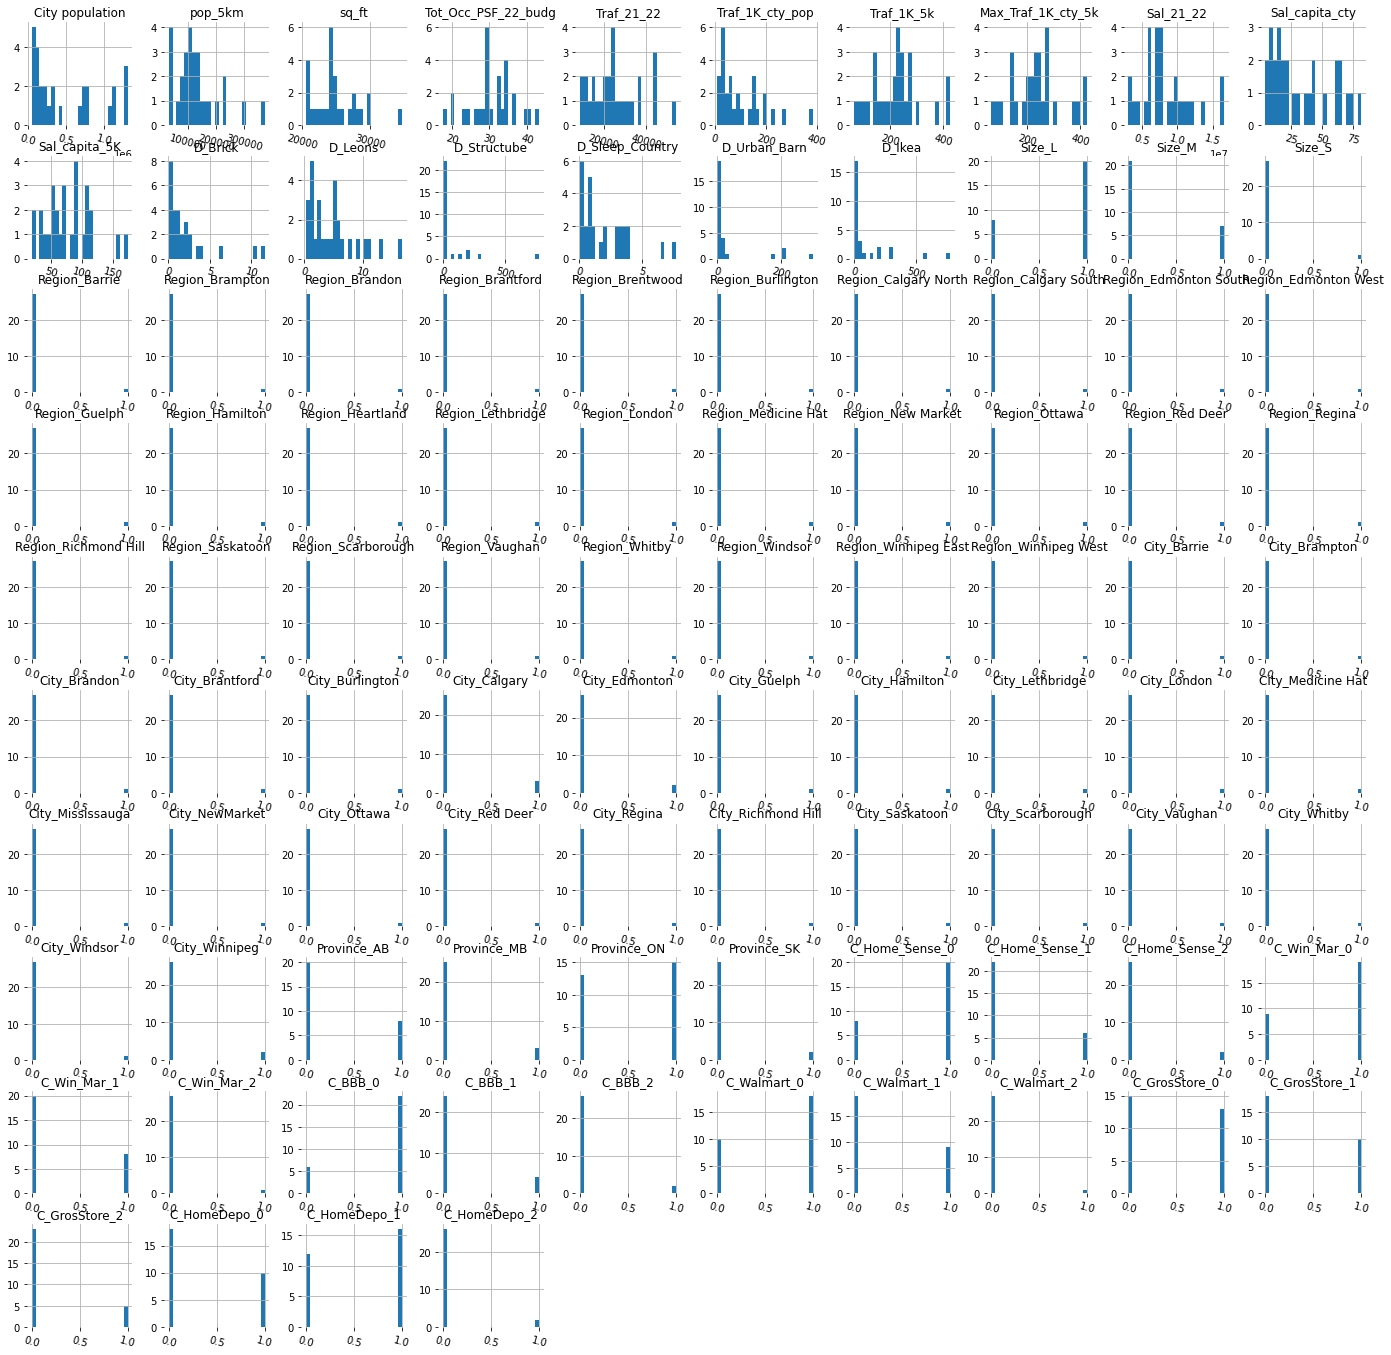

In [42]:
h = my_df.hist(bins=25,figsize=(24,24),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

plt.savefig(f'{figures_path}\\Location_info_collection_distribution.jpeg')

In [43]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# my_df_scaled = sc.fit_transform(my_df)

In [44]:
my_df.corr(method='spearman')

,City population,pop_5km,sq_ft,Tot_Occ_PSF_22_budg,Traf_21_22,Traf_1K_cty_pop,Traf_1K_5k,Max_Traf_1K_cty_5k,Sal_21_22,Sal_capita_cty,...,C_BBB_2,C_Walmart_0,C_Walmart_1,C_Walmart_2,C_GrosStore_0,C_GrosStore_1,C_GrosStore_2,C_HomeDepo_0,C_HomeDepo_1,C_HomeDepo_2
City population,1.000000,0.483977,0.397699,0.590249,0.516845,-0.891263,-0.115311,-0.212818,0.587784,-0.924131,...,-0.309270,0.244724,-0.161071,-0.226521,-0.102035,0.147758,-0.051991,0.087731,-0.120712,0.068727
pop_5km,0.483977,1.000000,0.368911,0.434045,0.559934,-0.304324,-0.691297,-0.490969,0.384784,-0.468528,...,-0.257513,0.332182,-0.250875,-0.226335,-0.048759,0.166091,-0.144301,0.000000,0.071474,-0.137340
sq_ft,0.397699,0.368911,1.000000,-0.074986,0.348659,-0.335523,-0.147783,-0.268199,0.467433,-0.308155,...,-0.412021,0.267591,-0.231941,-0.107211,0.181738,-0.258364,0.086581,0.009227,-0.098277,0.171675
Tot_Occ_PSF_22_budg,0.590249,0.434045,-0.074986,1.000000,0.636563,-0.322386,0.047072,0.189929,0.544061,-0.440613,...,-0.103005,0.009227,0.061535,-0.178685,-0.270391,0.461364,-0.225110,-0.046136,0.089343,-0.085838
Traf_21_22,0.516845,0.559934,0.348659,0.636563,1.000000,-0.136289,0.122605,0.291188,0.837986,-0.273673,...,-0.103005,0.119955,-0.042601,-0.202510,-0.039894,0.018455,0.028860,-0.156864,0.134014,0.034335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C_GrosStore_1,0.147758,0.166091,-0.258364,0.461364,0.018455,-0.138409,-0.156864,-0.036909,-0.073818,-0.184546,...,0.082690,-0.066667,0.125397,-0.143444,-0.693889,1.000000,-0.347524,0.066667,0.043033,-0.206725
C_GrosStore_2,-0.051991,-0.144301,0.086581,-0.225110,0.028860,0.086581,0.259743,0.248199,-0.098125,0.005772,...,-0.129315,0.152911,-0.121228,-0.089730,-0.434057,-0.347524,1.000000,-0.152911,-0.161515,0.594850
C_HomeDepo_0,0.087731,0.000000,0.009227,-0.046136,-0.156864,-0.138409,-0.230682,-0.073818,-0.129182,-0.129182,...,-0.206725,0.244444,-0.193796,-0.143444,0.053376,0.066667,-0.152911,1.000000,-0.860663,-0.206725
C_HomeDepo_1,-0.120712,0.071474,-0.098277,0.089343,0.134014,0.178685,0.125080,-0.008934,0.169751,0.178685,...,0.240192,-0.344265,0.286982,0.166667,0.082690,0.043033,-0.161515,-0.860663,1.000000,-0.320256


In [45]:
my_df.columns

Index(['Brand', 'City population', 'pop_5km', 'sq_ft', 'Tot_Occ_PSF_22_budg',
       'Traf_21_22', 'Traf_1K_cty_pop', 'Traf_1K_5k', 'Max_Traf_1K_cty_5k',
       'Sal_21_22', 'Sal_capita_cty', 'Sal_capita_5K', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea', 'Size_L',
       'Size_M', 'Size_S', 'Region_Barrie', 'Region_Brampton',
       'Region_Brandon', 'Region_Brantford', 'Region_Brentwood',
       'Region_Burlington', 'Region_Calgary North', 'Region_Calgary South',
       'Region_Edmonton South', 'Region_Edmonton West', 'Region_Guelph',
       'Region_Hamilton', 'Region_Heartland', 'Region_Lethbridge',
       'Region_London', 'Region_Medicine Hat', 'Region_New Market',
       'Region_Ottawa', 'Region_Red Deer', 'Region_Regina',
       'Region_Richmond Hill', 'Region_Saskatoon', 'Region_Scarborough',
       'Region_Vaughan', 'Region_Whitby', 'Region_Windsor',
       'Region_Winnipeg East', 'Region_Winnipeg West', 'City_Barrie',
       'City_Bram

In [46]:
target_tr = ['Traf_21_22', 'Traf_1K_cty_pop', 'Traf_1K_5k', 'Sal_21_22', 'Sal_capita_cty', 'Sal_capita_5K']

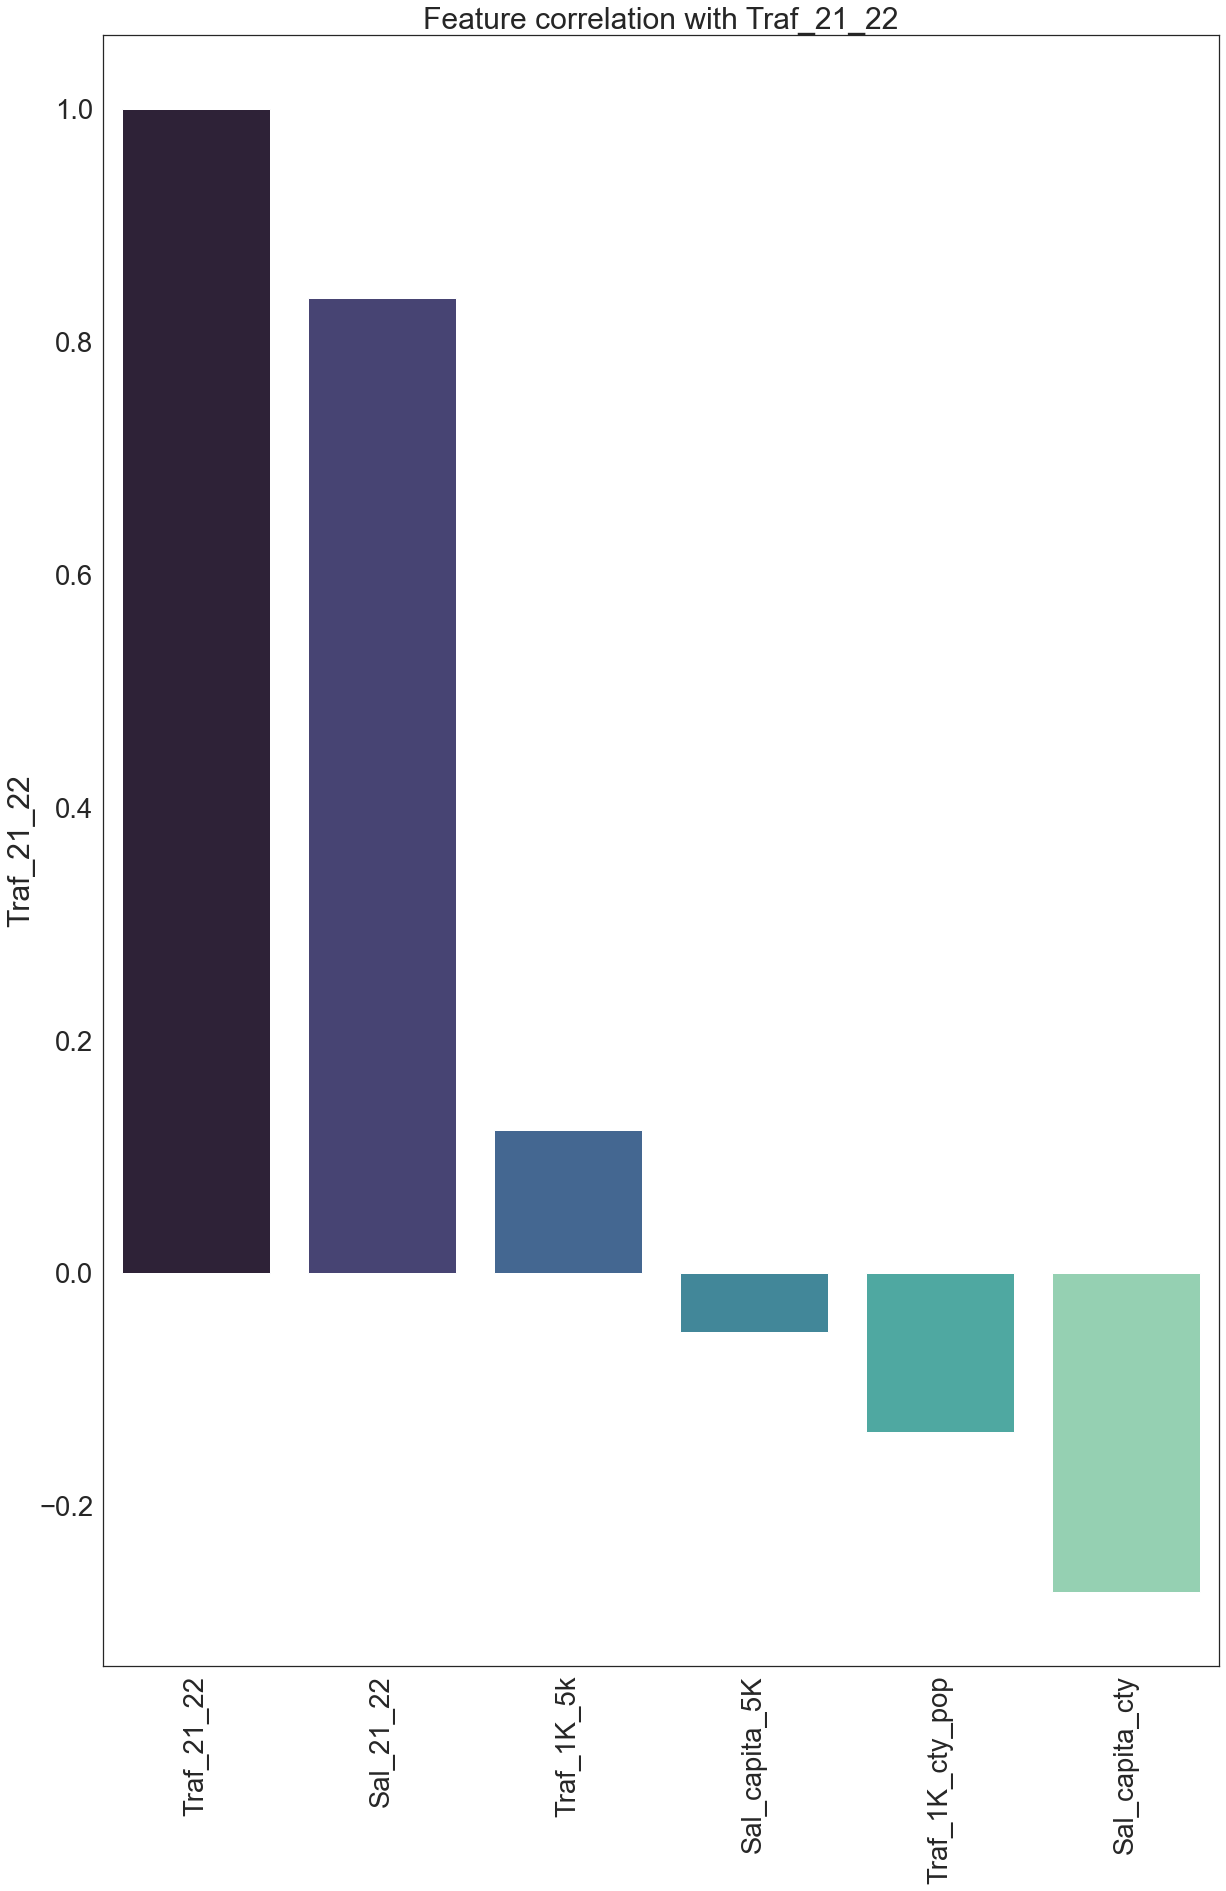

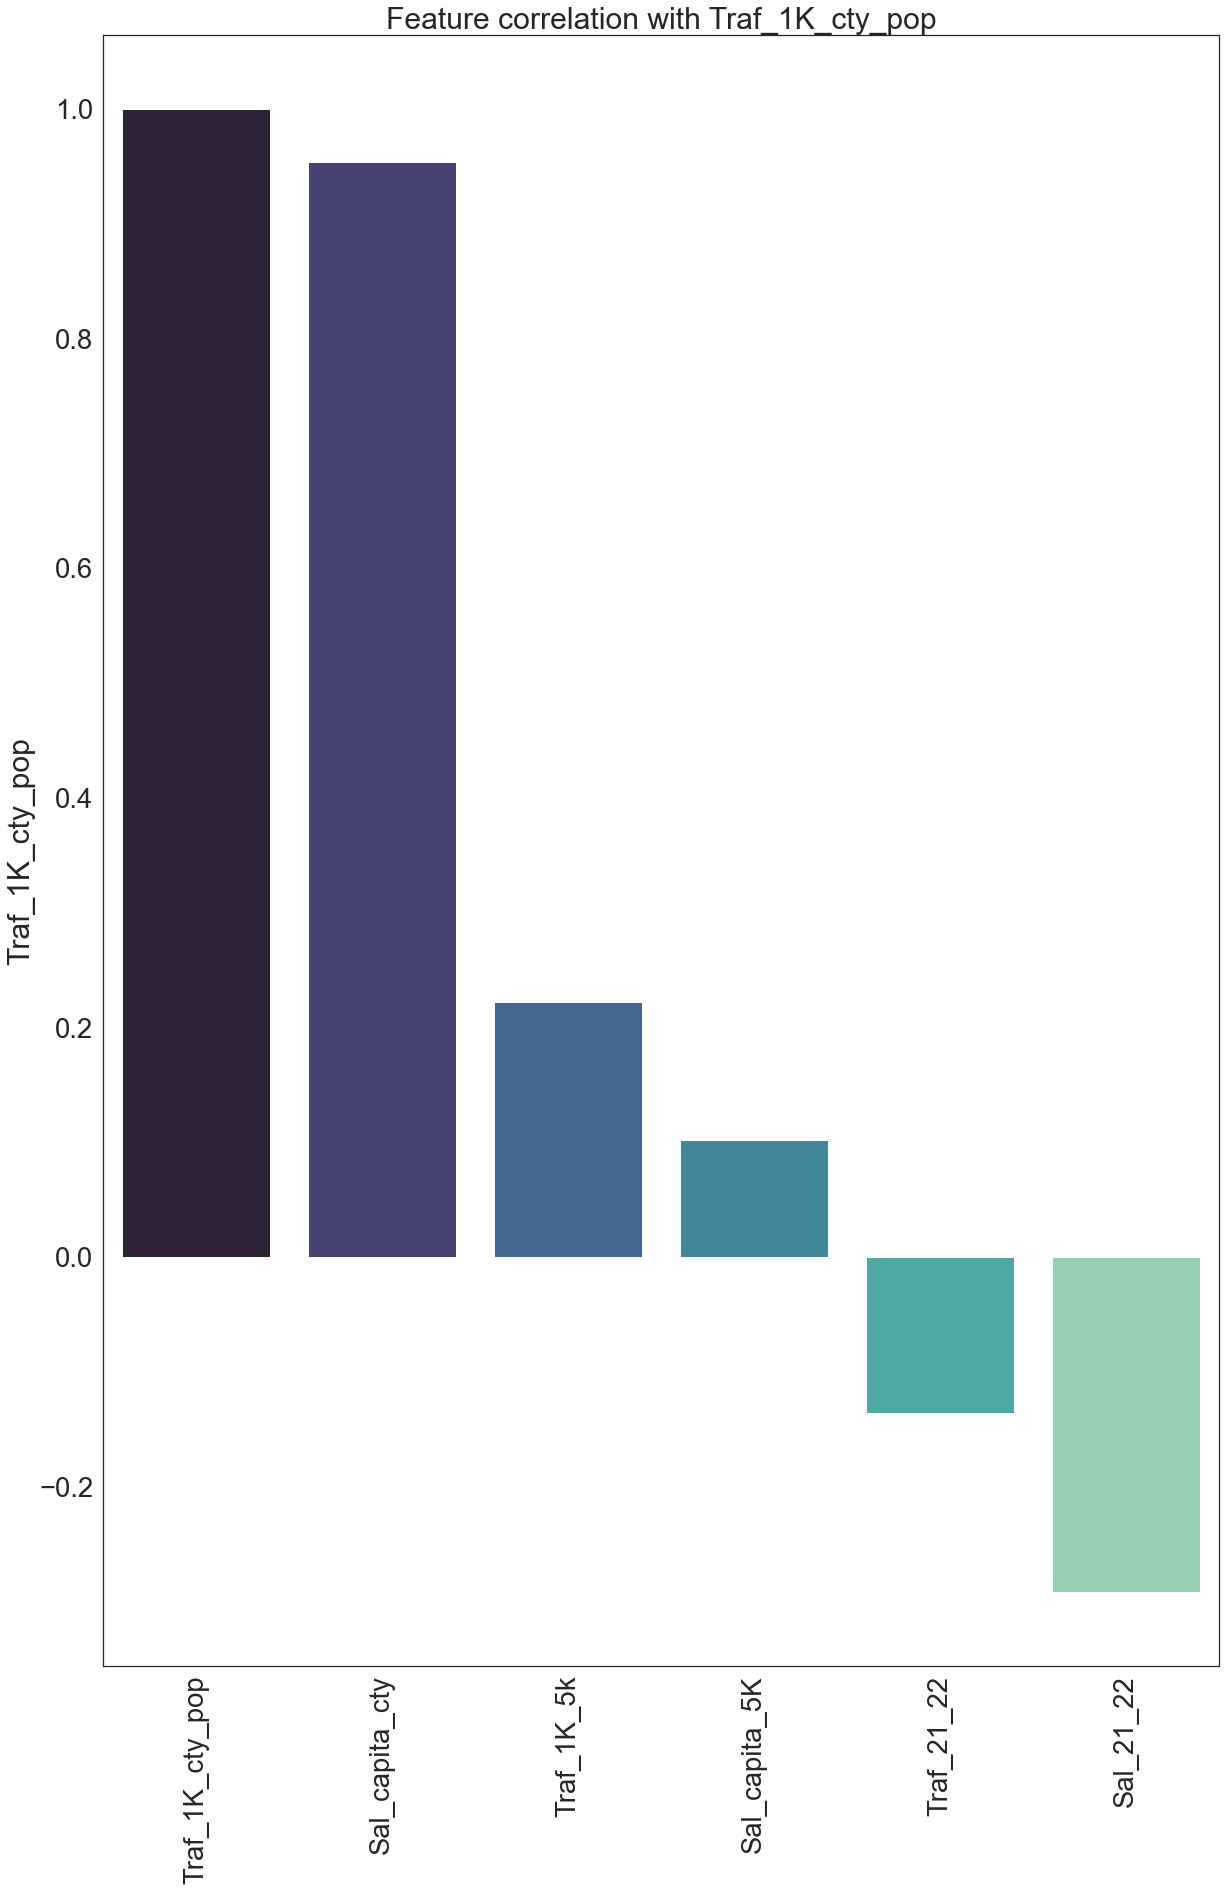

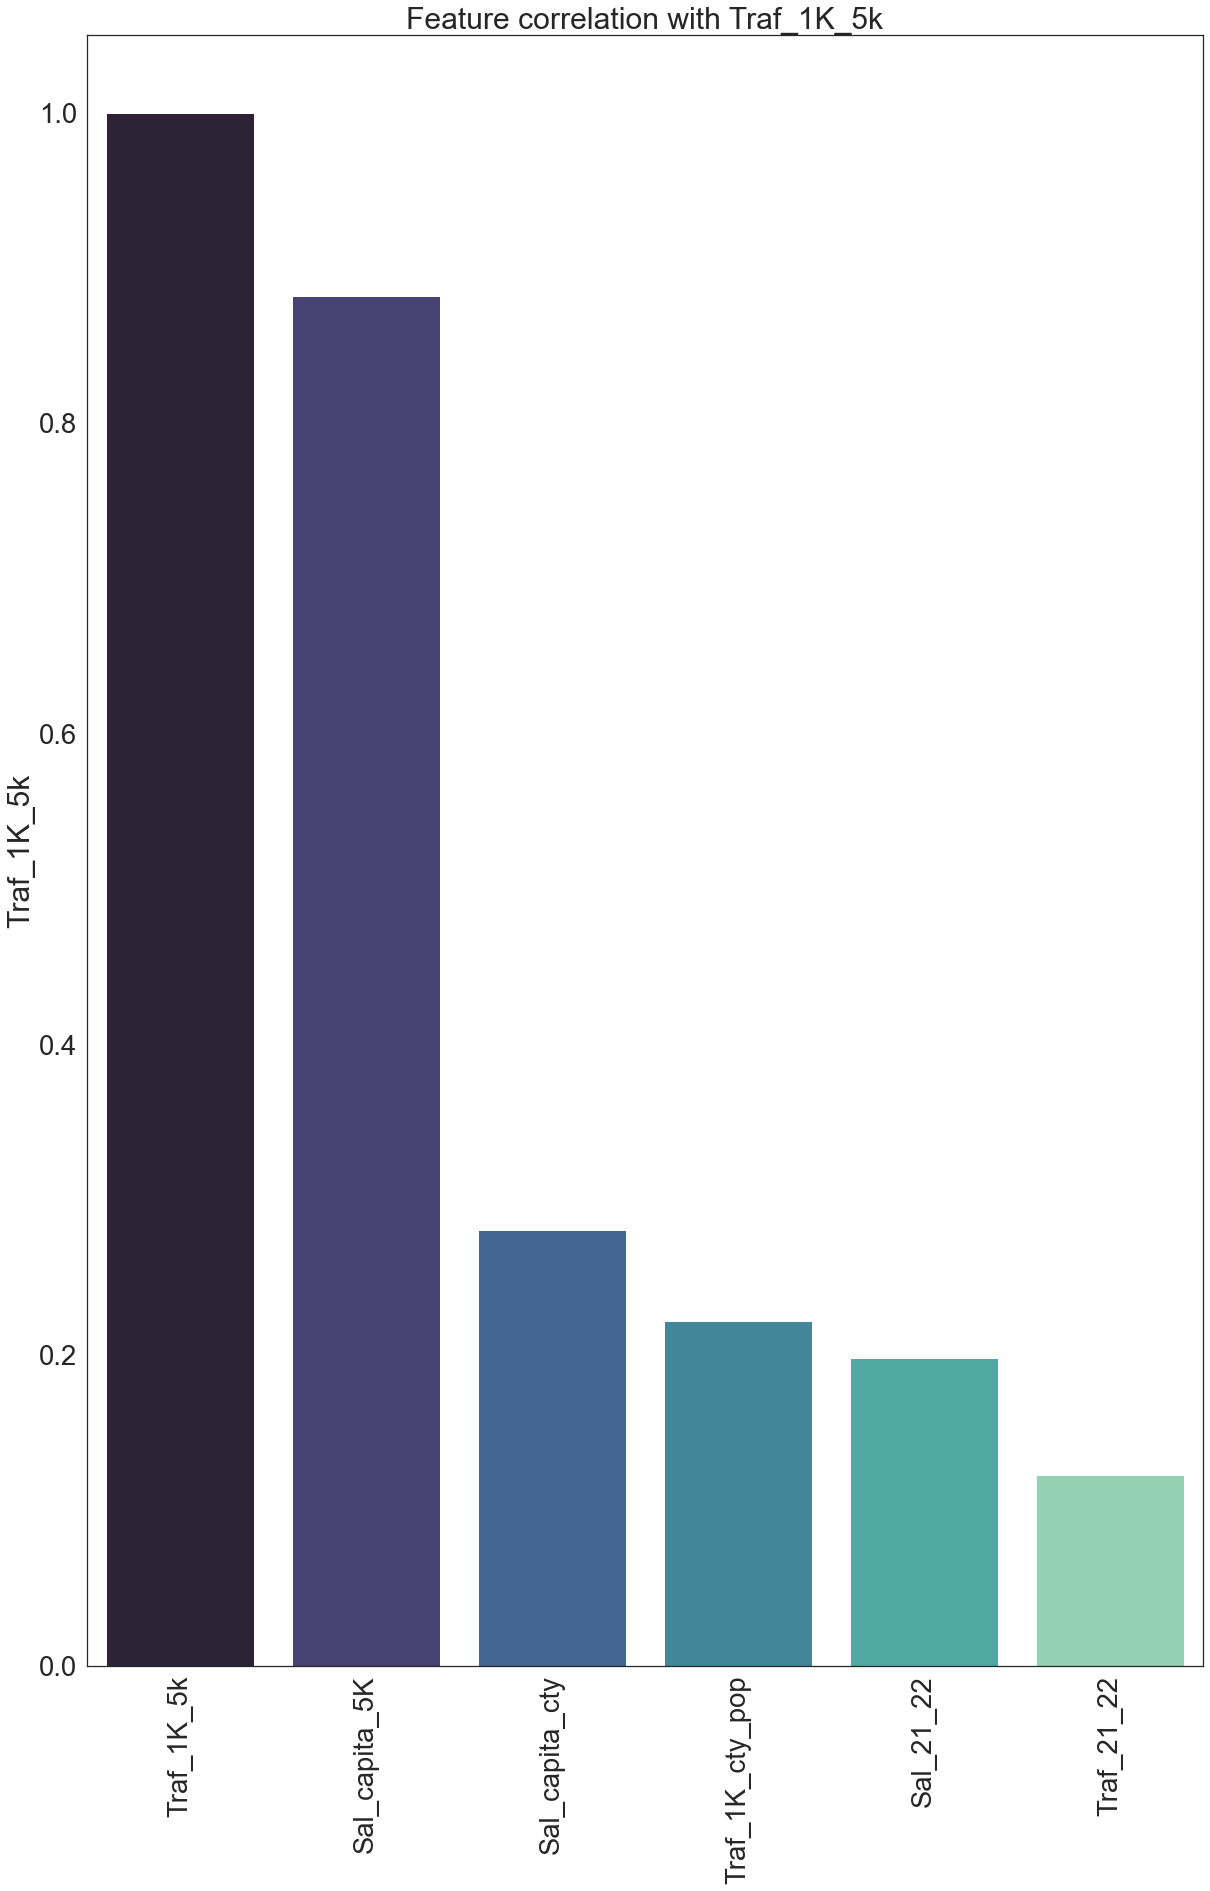

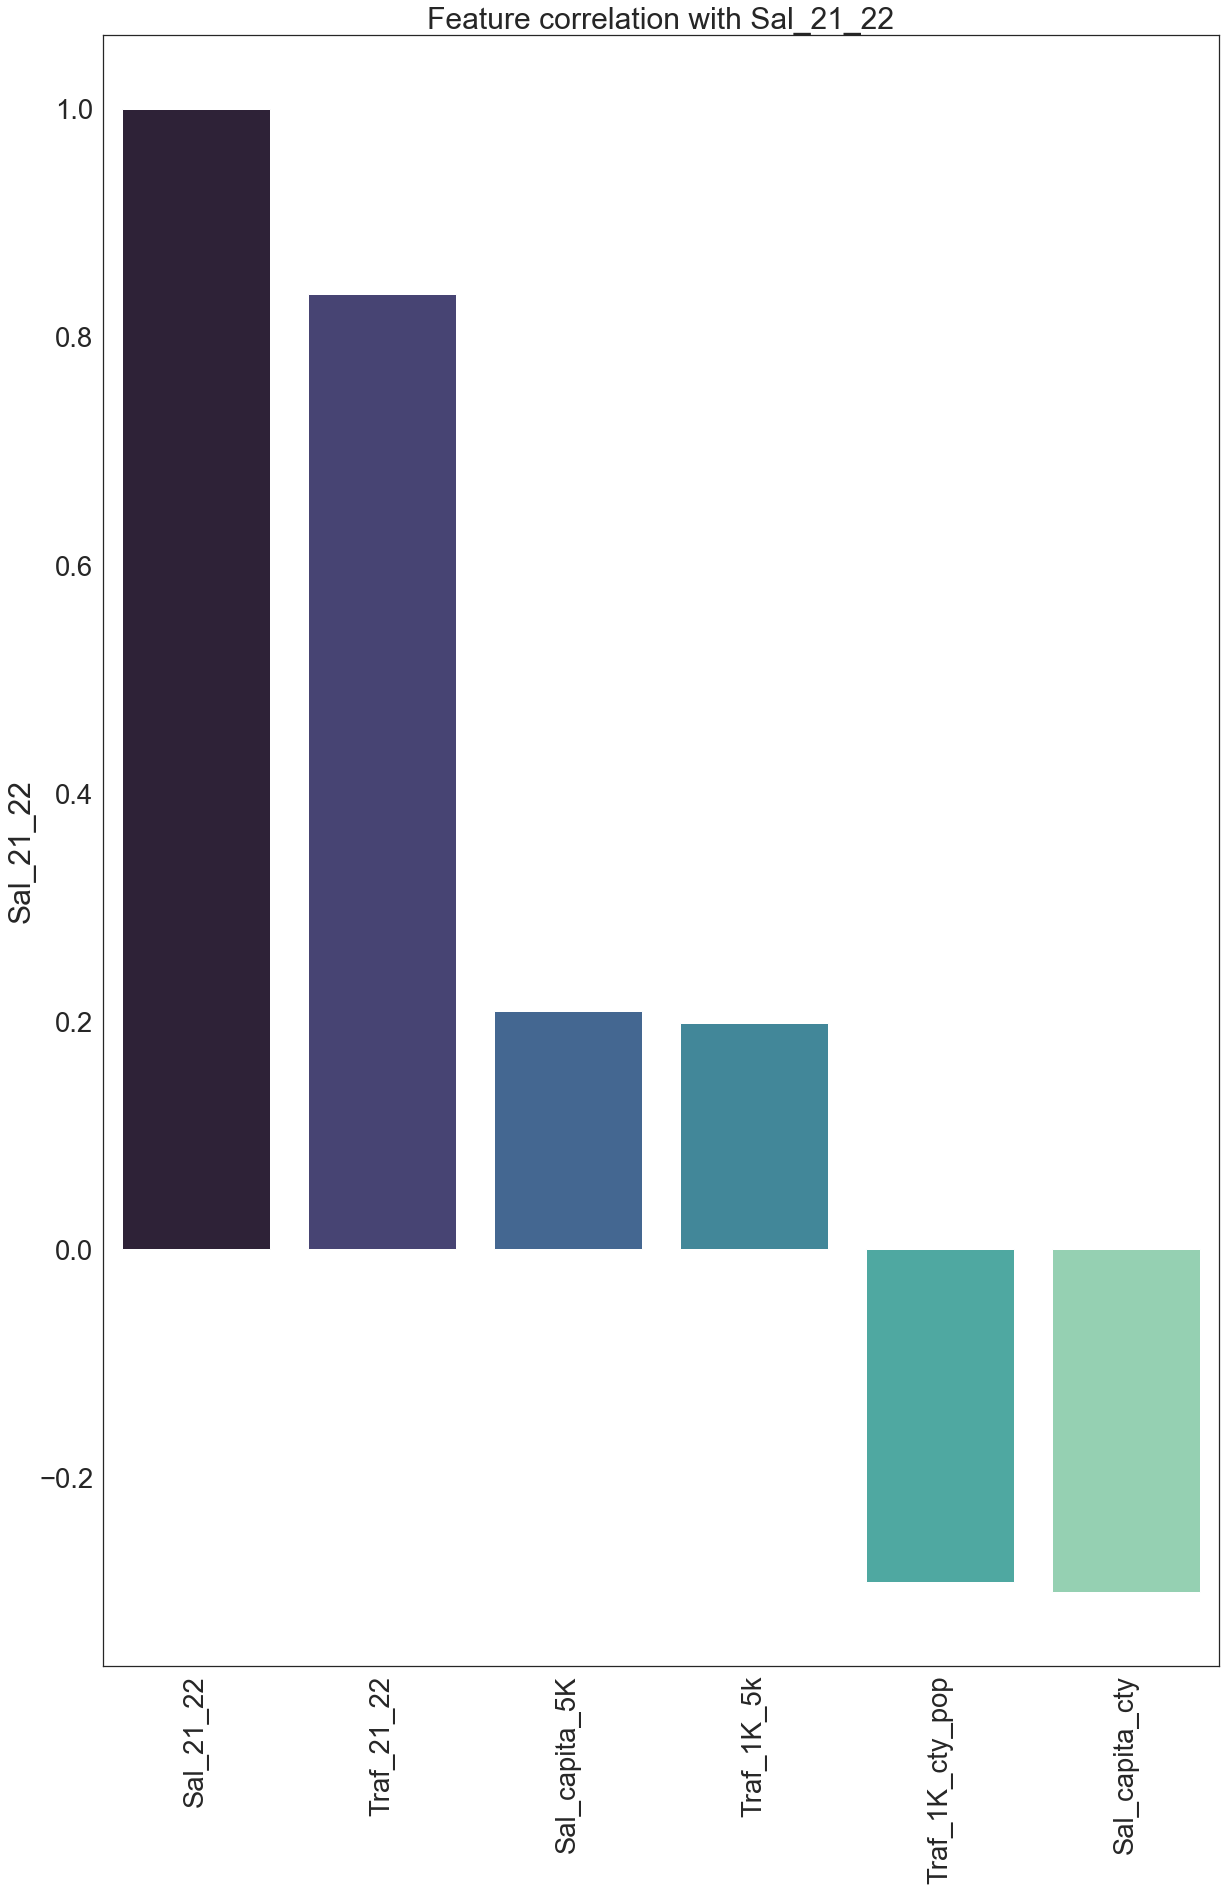

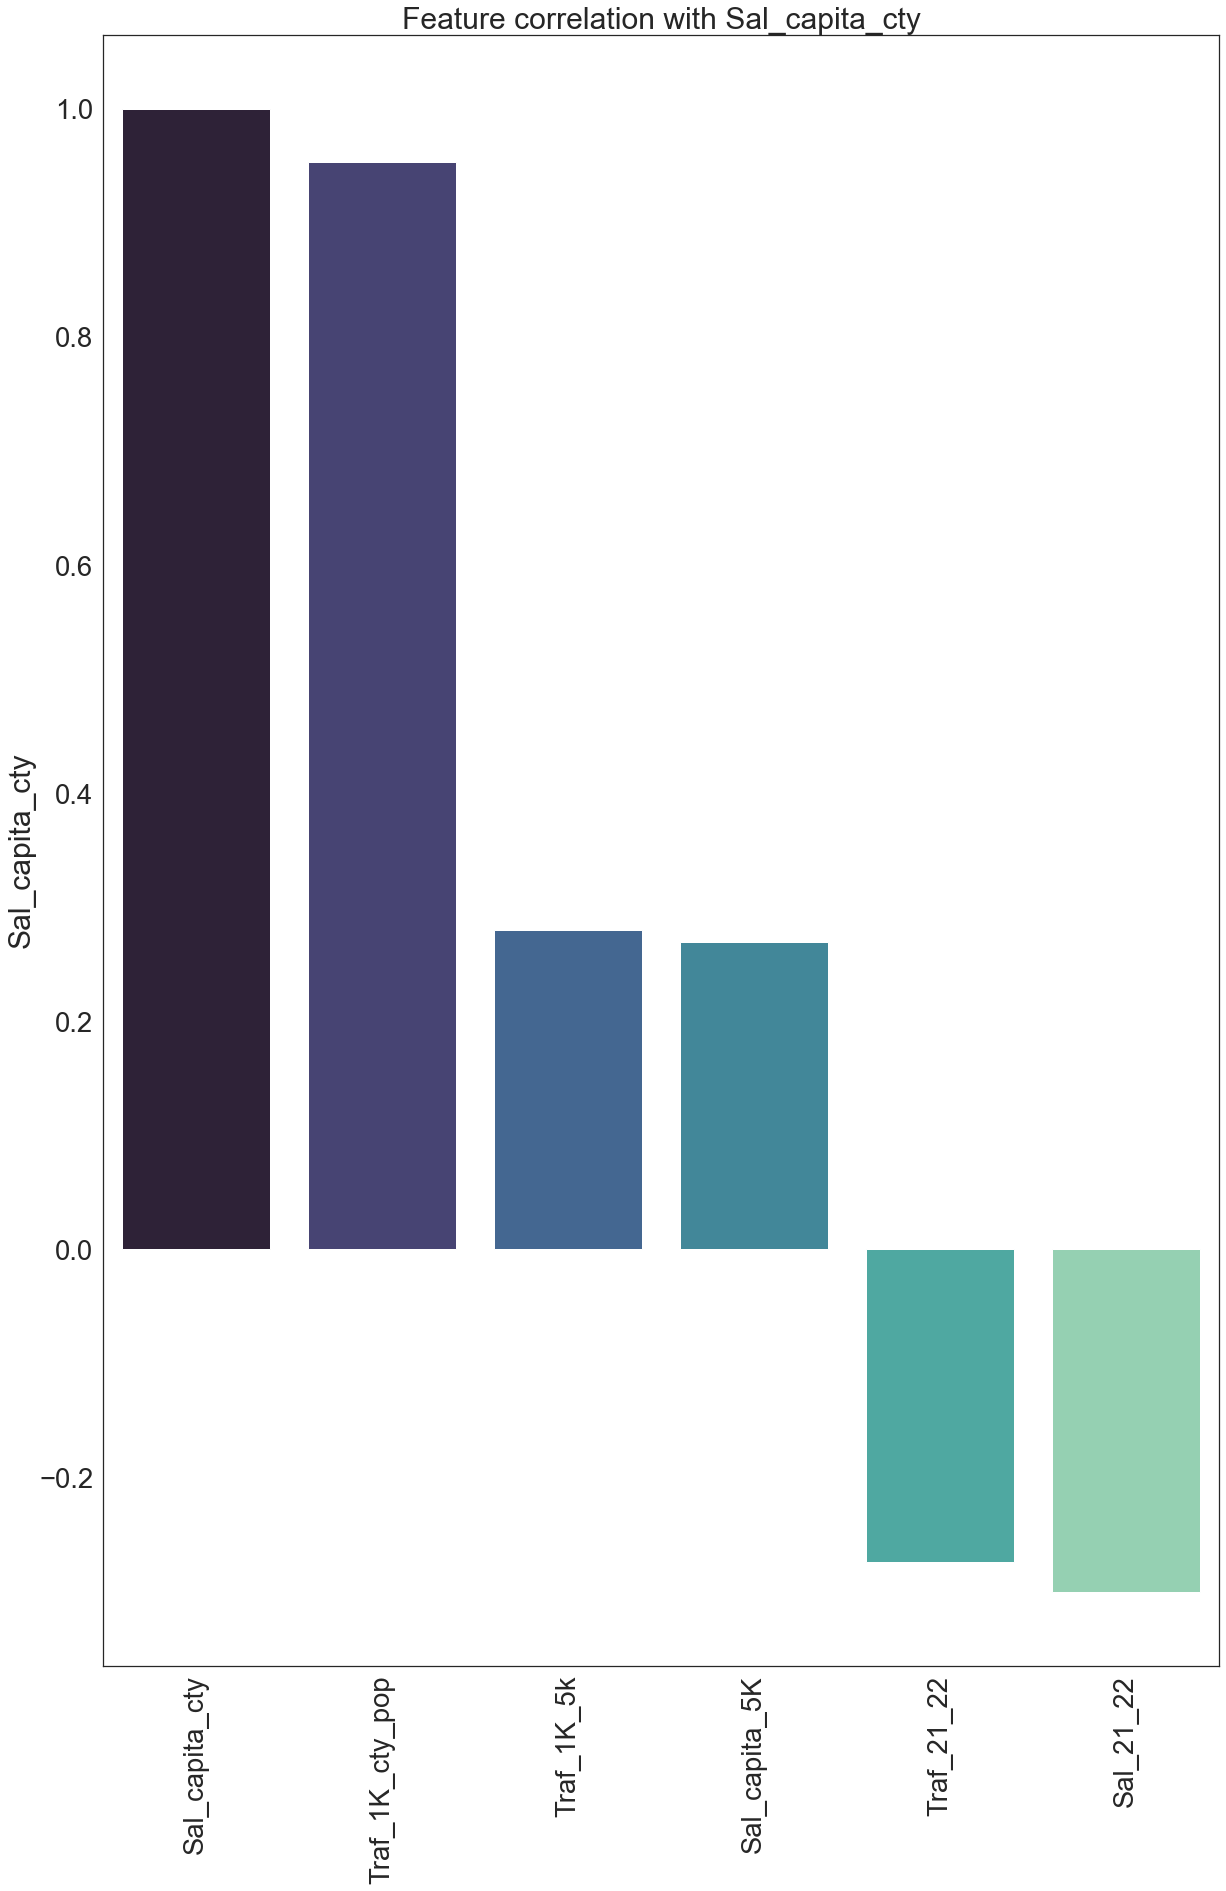

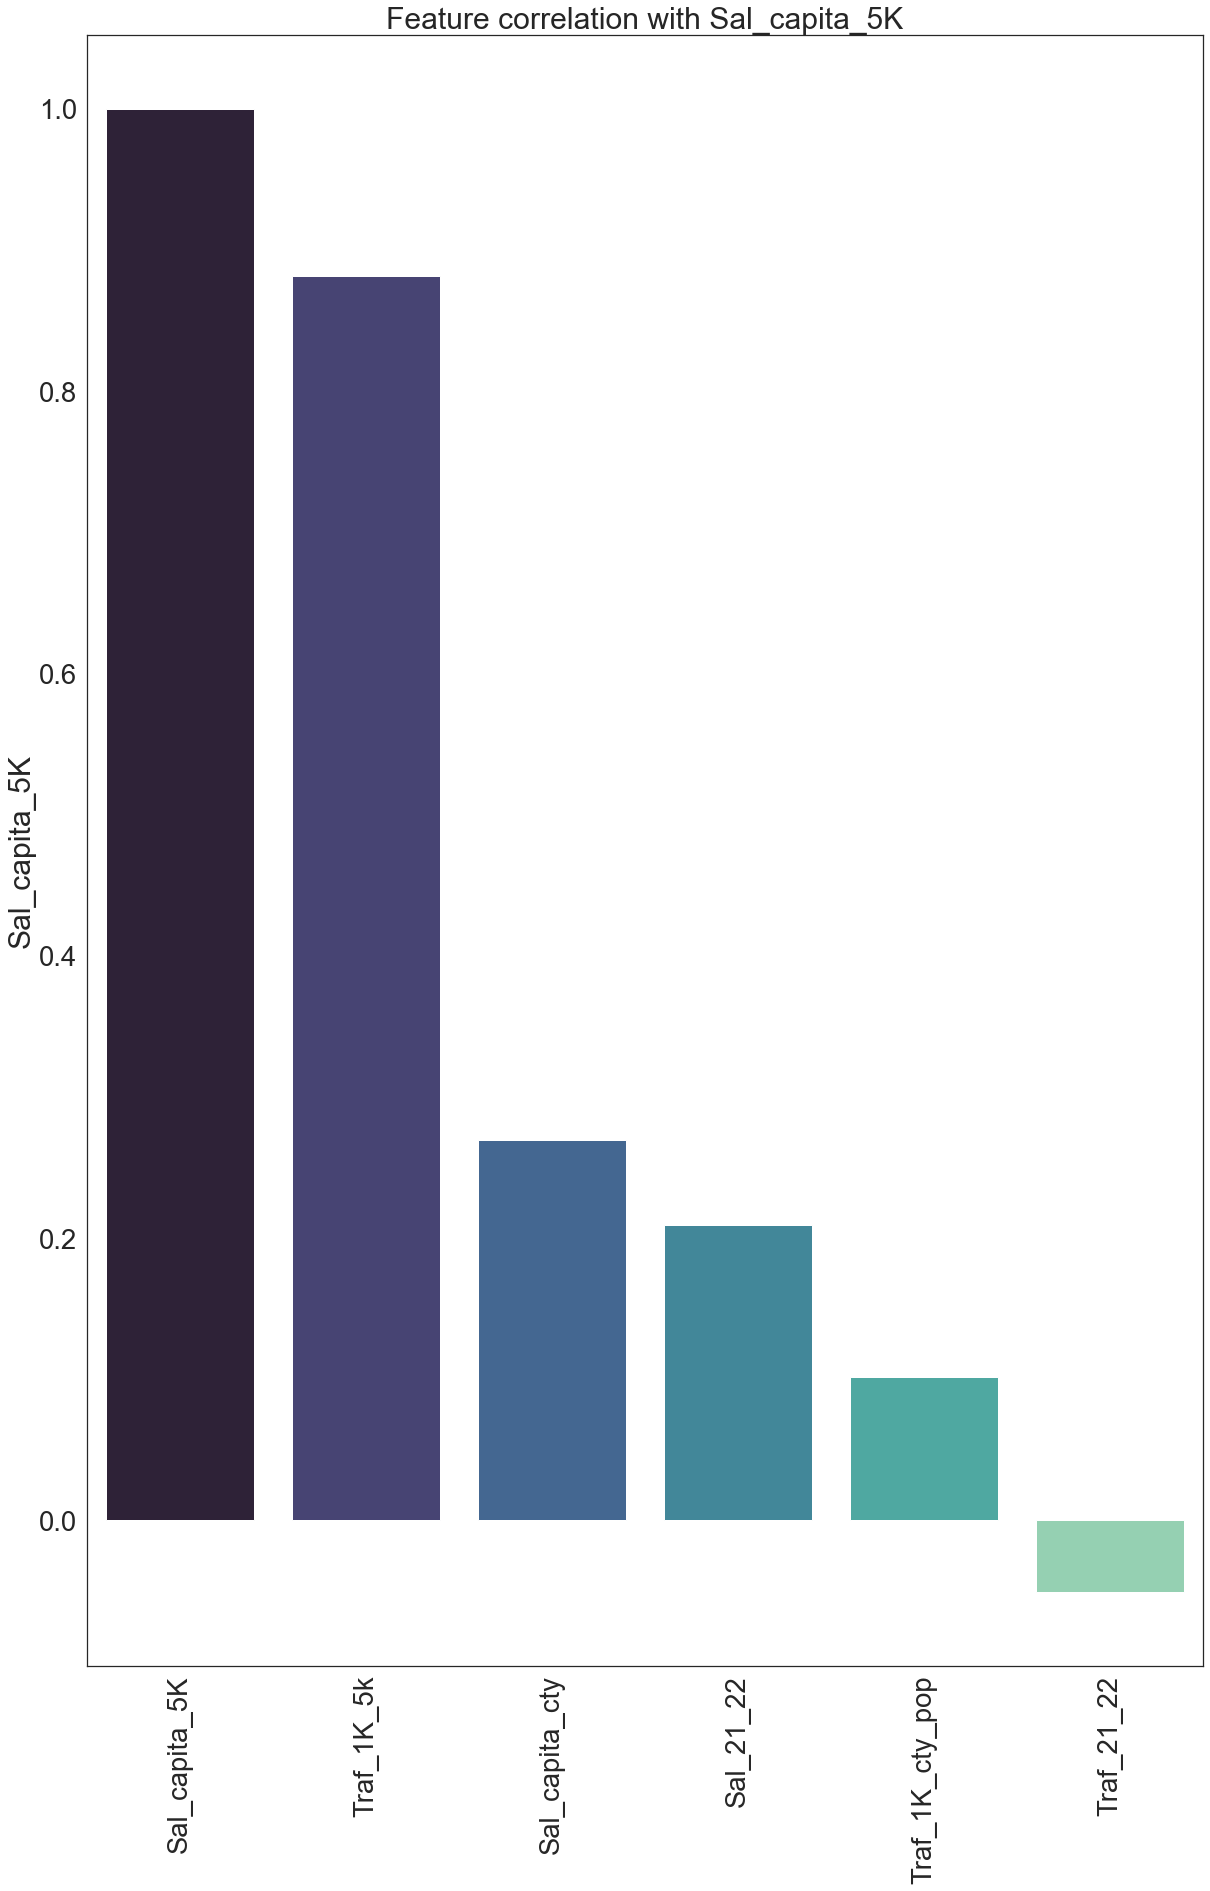

In [47]:
for t in target_tr:
    
    corr = my_df[target_tr].corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\Competiotors_Location_Traffic_correlation_{t}.jpeg')

In [48]:
my_df.columns

Index(['Brand', 'City population', 'pop_5km', 'sq_ft', 'Tot_Occ_PSF_22_budg',
       'Traf_21_22', 'Traf_1K_cty_pop', 'Traf_1K_5k', 'Max_Traf_1K_cty_5k',
       'Sal_21_22', 'Sal_capita_cty', 'Sal_capita_5K', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea', 'Size_L',
       'Size_M', 'Size_S', 'Region_Barrie', 'Region_Brampton',
       'Region_Brandon', 'Region_Brantford', 'Region_Brentwood',
       'Region_Burlington', 'Region_Calgary North', 'Region_Calgary South',
       'Region_Edmonton South', 'Region_Edmonton West', 'Region_Guelph',
       'Region_Hamilton', 'Region_Heartland', 'Region_Lethbridge',
       'Region_London', 'Region_Medicine Hat', 'Region_New Market',
       'Region_Ottawa', 'Region_Red Deer', 'Region_Regina',
       'Region_Richmond Hill', 'Region_Saskatoon', 'Region_Scarborough',
       'Region_Vaughan', 'Region_Whitby', 'Region_Windsor',
       'Region_Winnipeg East', 'Region_Winnipeg West', 'City_Barrie',
       'City_Bram

## Correlations with Cotenant variables

### Traf_1K_cty_pop vs. Cotenancy

In [49]:
cot_traf_1Kcitypop =  my_df[['Traf_1K_cty_pop', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

traf_1Kcitypop = ['Traf_1K_cty_pop'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [50]:
for t in traf_1Kcitypop:
    
    corr = cot_traf_1Kcitypop.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic per 1000 (city population)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competitors_Location_Data_correlation_{t}_Cotenancy.png')

NameError: name 'traf_1Kcitypop' is not defined

In [51]:
my_mask = np.zeros_like(cot_traf_1Kcitypop.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 50))
plt.title('Spearman Correlation Matrix for Cotenantcy and Traffic per 1000 (city population)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_traf_1Kcitypop.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenancy.png')

NameError: name 'cot_traf_1Kcitypop' is not defined

### Traf_1K_5k vs. Cotenancy

In [52]:
cot_traf_1K_5k =  my_df[['Traf_1K_5k', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

traf_1K_5k = ['Traf_1K_5k'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [53]:
for t in traf_1K_5k:
    
    corr = cot_traf_1K_5k.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic per 1000 (5km)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Cotenancy.png')

NameError: name 'traf_1K_5k' is not defined

In [54]:
my_mask = np.zeros_like(cot_traf_1K_5k.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Cotenantcy and Traffic per 1000 (5km)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_traf_1K_5k.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenancy.png')

NameError: name 'cot_traf_1K_5k' is not defined

### Traf_21_22 vs. Cotenancy

In [55]:
cot_traf_21_22 =  my_df[['Traf_21_22', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

traf_21_22 = ['Traf_21_22'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [56]:
for t in traf_21_22:
    
    corr = cot_traf_21_22.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic (3/1/2021 - 3/1/2022)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Cotenancy.jpeg')

NameError: name 'traf_21_22' is not defined

In [57]:
my_mask = np.zeros_like(cot_traf_21_22.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Cotenantcy and Traffic (3/1/2021 - 3/1/2022)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_traf_21_22.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenancy.jpeg')

NameError: name 'cot_traf_21_22' is not defined

### Sal_21_22 vs. Cotenancy

In [58]:
cot_Sal_21_22 =  my_df[['Sal_21_22', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

Sal_21_22 = ['Sal_21_22'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [59]:
for t in Sal_21_22:
    
    corr = cot_Sal_21_22.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Sales - Written (3/1/2021 - 3/1/2022)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Cotenancy.png')

NameError: name 'Sal_21_22' is not defined

In [60]:
my_mask = np.zeros_like(cot_Sal_21_22.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Cotenantcy and Sales - Written (3/1/2021 - 3/1/2022)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_Sal_21_22.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenancy.png')

NameError: name 'cot_Sal_21_22' is not defined

### Sal_capita_cty vs. Cotenancy

In [61]:
cot_Sal_capita_cty =  my_df[['Sal_capita_cty', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

Sal_capita_cty = ['Sal_capita_cty'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [62]:
for t in Sal_capita_cty:
    
    corr = cot_Sal_capita_cty.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Cotenancy.png')

NameError: name 'Sal_capita_cty' is not defined

In [63]:
my_mask = np.zeros_like(cot_Sal_capita_cty.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix for Cotenantcy and Sales per capita (city)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_Sal_capita_cty.corr(),annot=True,annot_kws={"size":35},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenancy.png')

NameError: name 'cot_Sal_capita_cty' is not defined

### Sal_capita_5K vs. Cotenancy

In [64]:
cot_Sal_capita_5K =  my_df[['Sal_capita_5K', 'C_Home_Sense_0.0', 'C_Home_Sense_1.0',
       'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0',
       'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0',
       'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0',
       'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0',
       'C_HomeDepo_2.0']]

Sal_capita_5K = ['Sal_capita_5K'] 

KeyError: "['C_Home_Sense_0.0', 'C_Home_Sense_1.0', 'C_Home_Sense_2.0', 'C_Win_Mar_0.0', 'C_Win_Mar_1.0', 'C_Win_Mar_2.0', 'C_BBB_0.0', 'C_BBB_1.0', 'C_BBB_2.0', 'C_Walmart_0.0', 'C_Walmart_1.0', 'C_Walmart_2.0', 'C_GrosStore_0.0', 'C_GrosStore_1.0', 'C_GrosStore_2.0', 'C_HomeDepo_0.0', 'C_HomeDepo_1.0', 'C_HomeDepo_2.0'] not in index"

In [65]:
for t in Sal_capita_5K:
    
    corr = cot_Sal_capita_5K.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\Competiotors_Location_Data_correlation_{t}_Cotenancy.png')

NameError: name 'Sal_capita_5K' is not defined

In [66]:
my_mask = np.zeros_like(cot_Sal_capita_5K.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix for Cotenantcy and Sales per capita (5K)', fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(cot_Sal_capita_5K.corr(),annot=True,annot_kws={"size":35},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Cotenantcy.png')

NameError: name 'cot_Sal_capita_5K' is not defined

## Correlations with Cotenant Distance variables

### Traf_1K_cty_pop vs. Distance

In [67]:
dis_traf_1Kcitypop =  my_df[['Traf_1K_cty_pop', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

traf_1Kcitypop = ['Traf_1K_cty_pop'] 

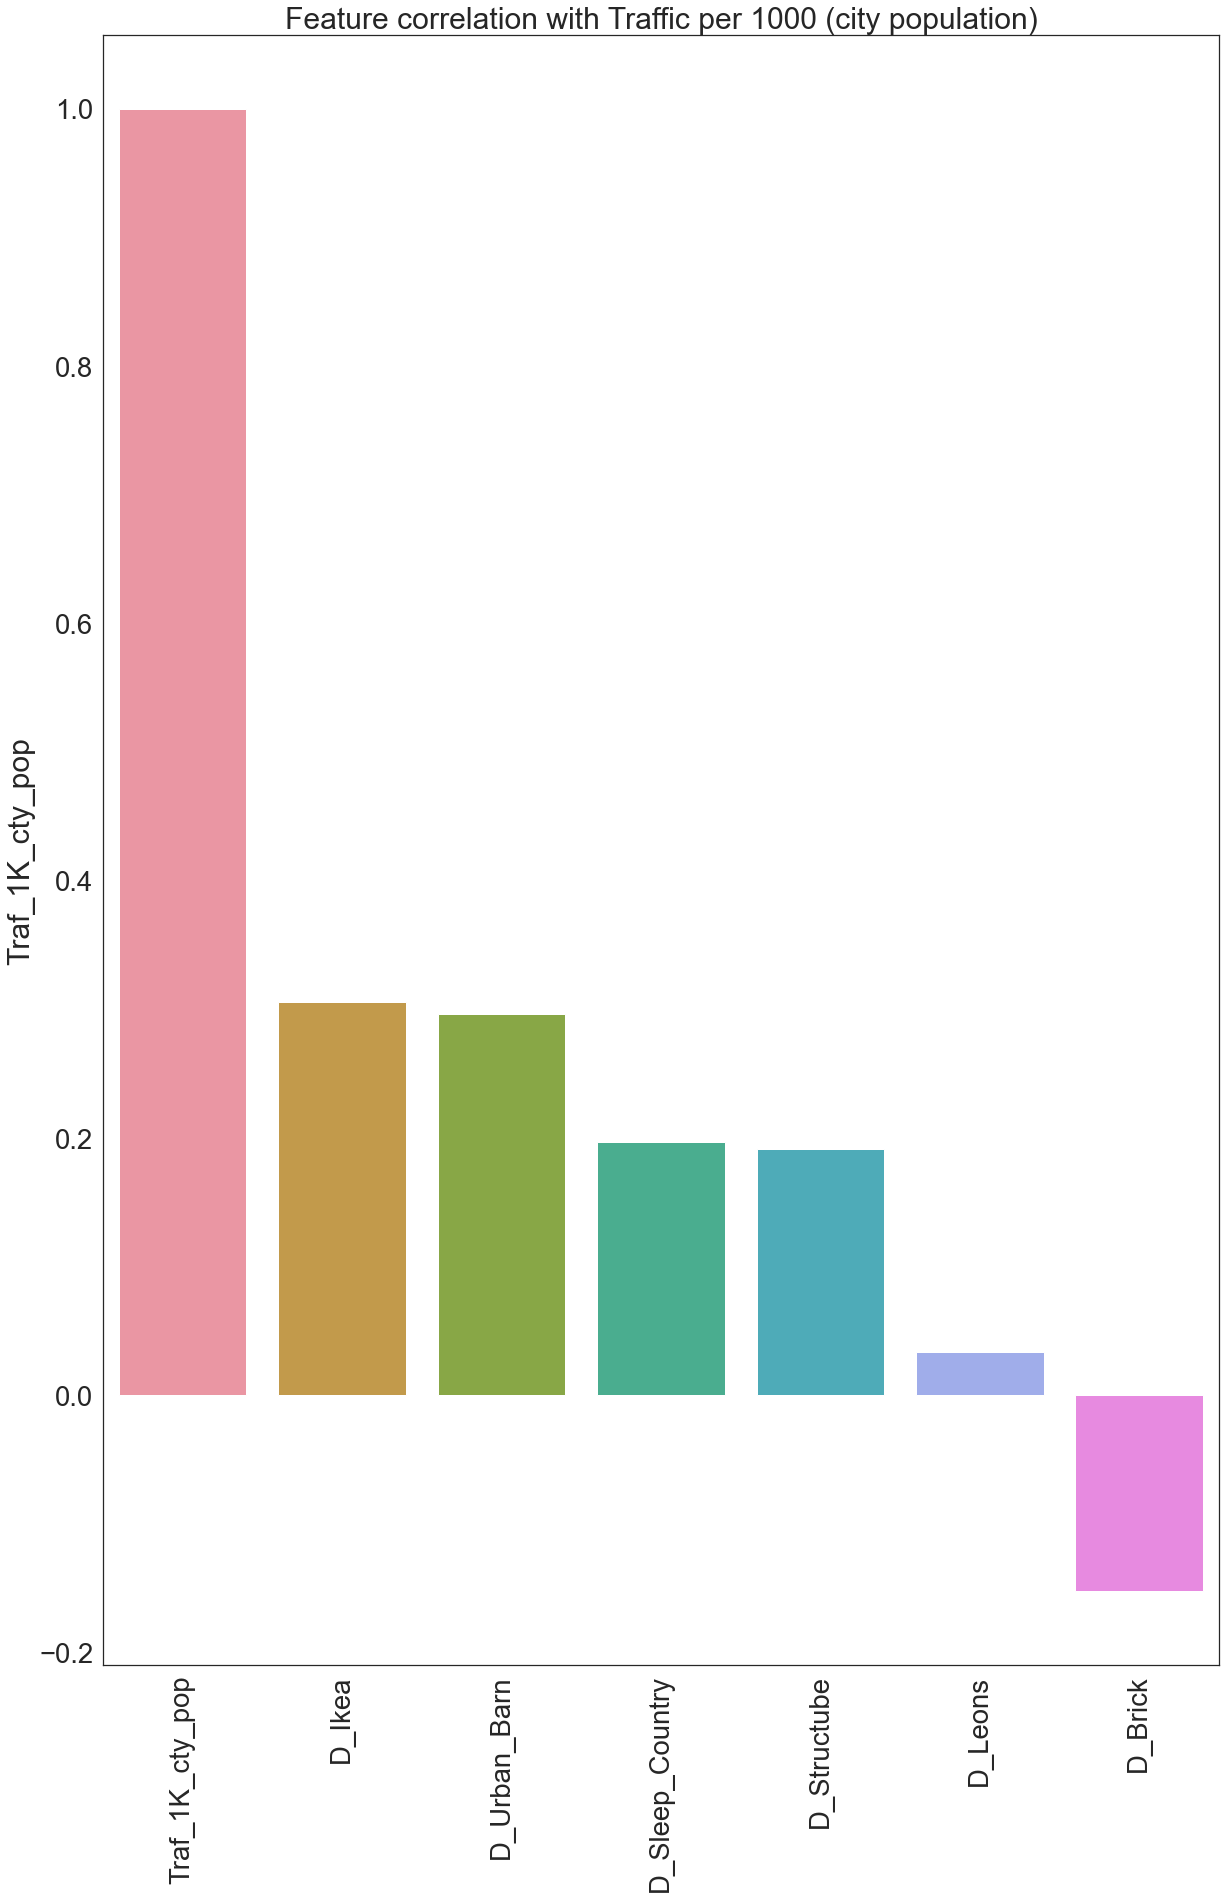

In [68]:
for t in traf_1Kcitypop:
    
    corr = dis_traf_1Kcitypop.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic per 1000 (city population)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competitors_Location_Data_correlation_{t}_Distance.png')

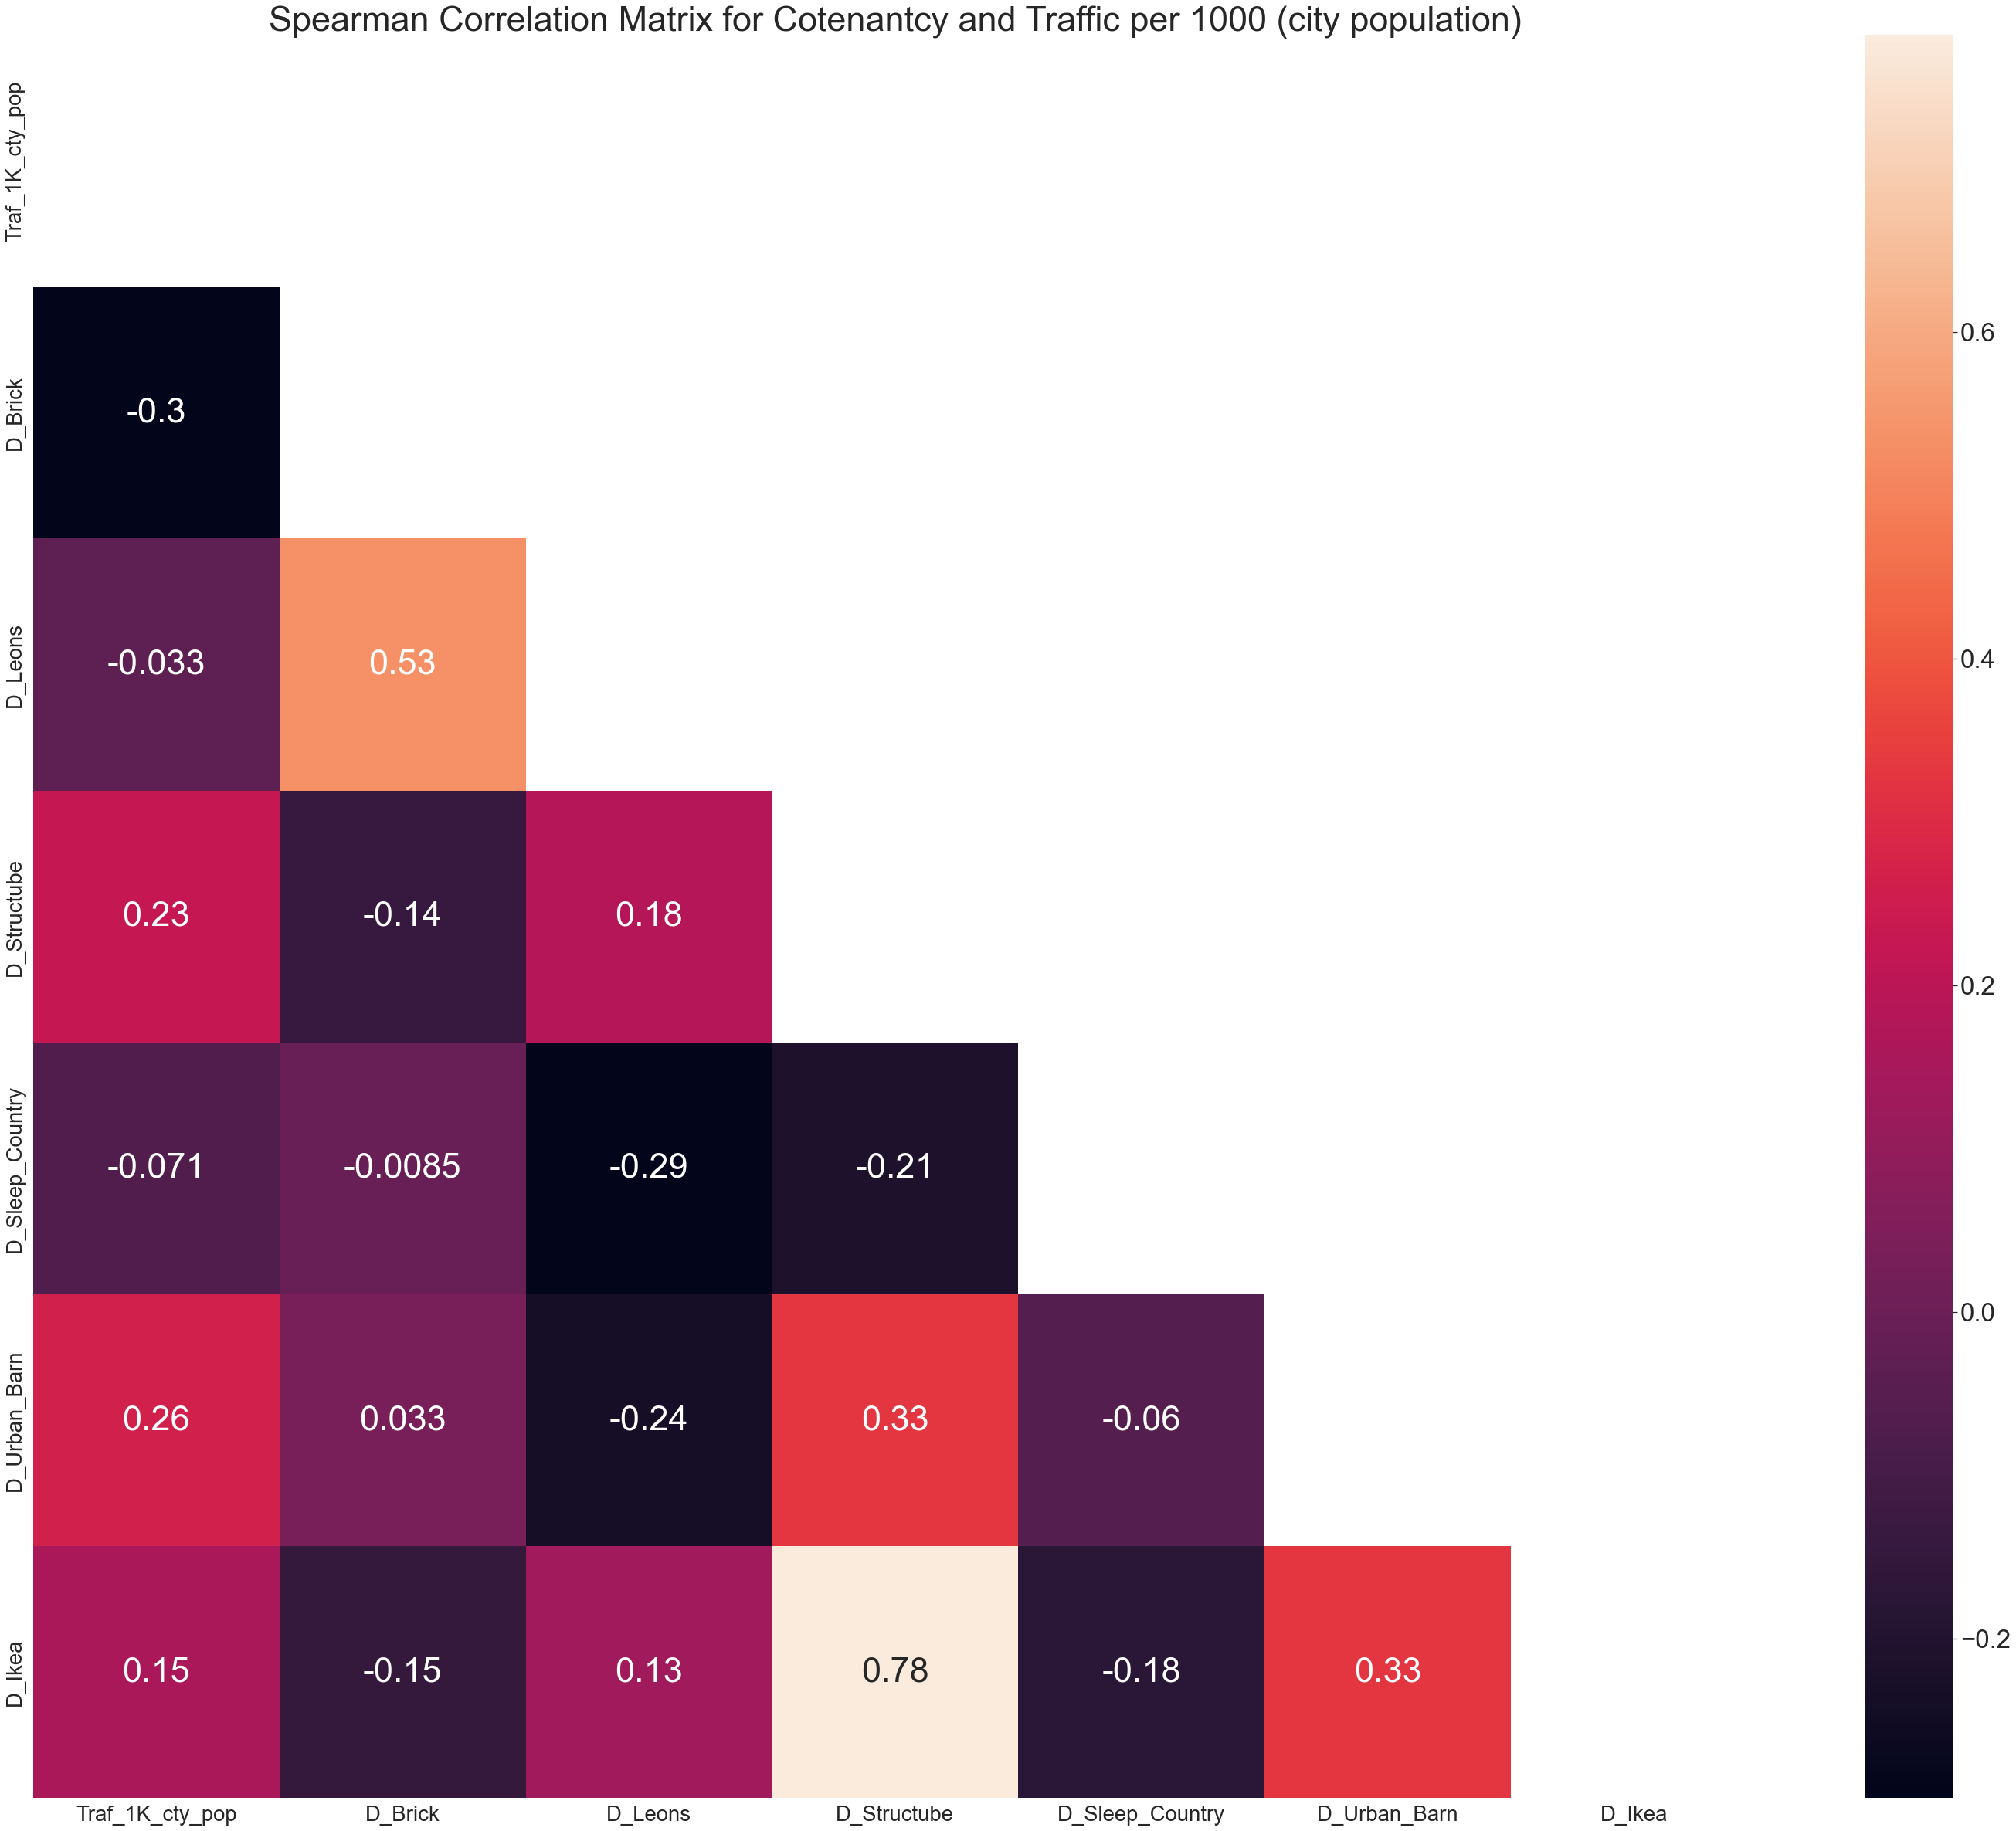

In [69]:
my_mask = np.zeros_like(dis_traf_1Kcitypop.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Cotenantcy and Traffic per 1000 (city population)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dis_traf_1Kcitypop.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

### Traf_1K_5k vs. Distance

In [70]:
dis_traf_1K_5k =  my_df[['Traf_1K_5k',  'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

traf_1K_5k = ['Traf_1K_5k'] 

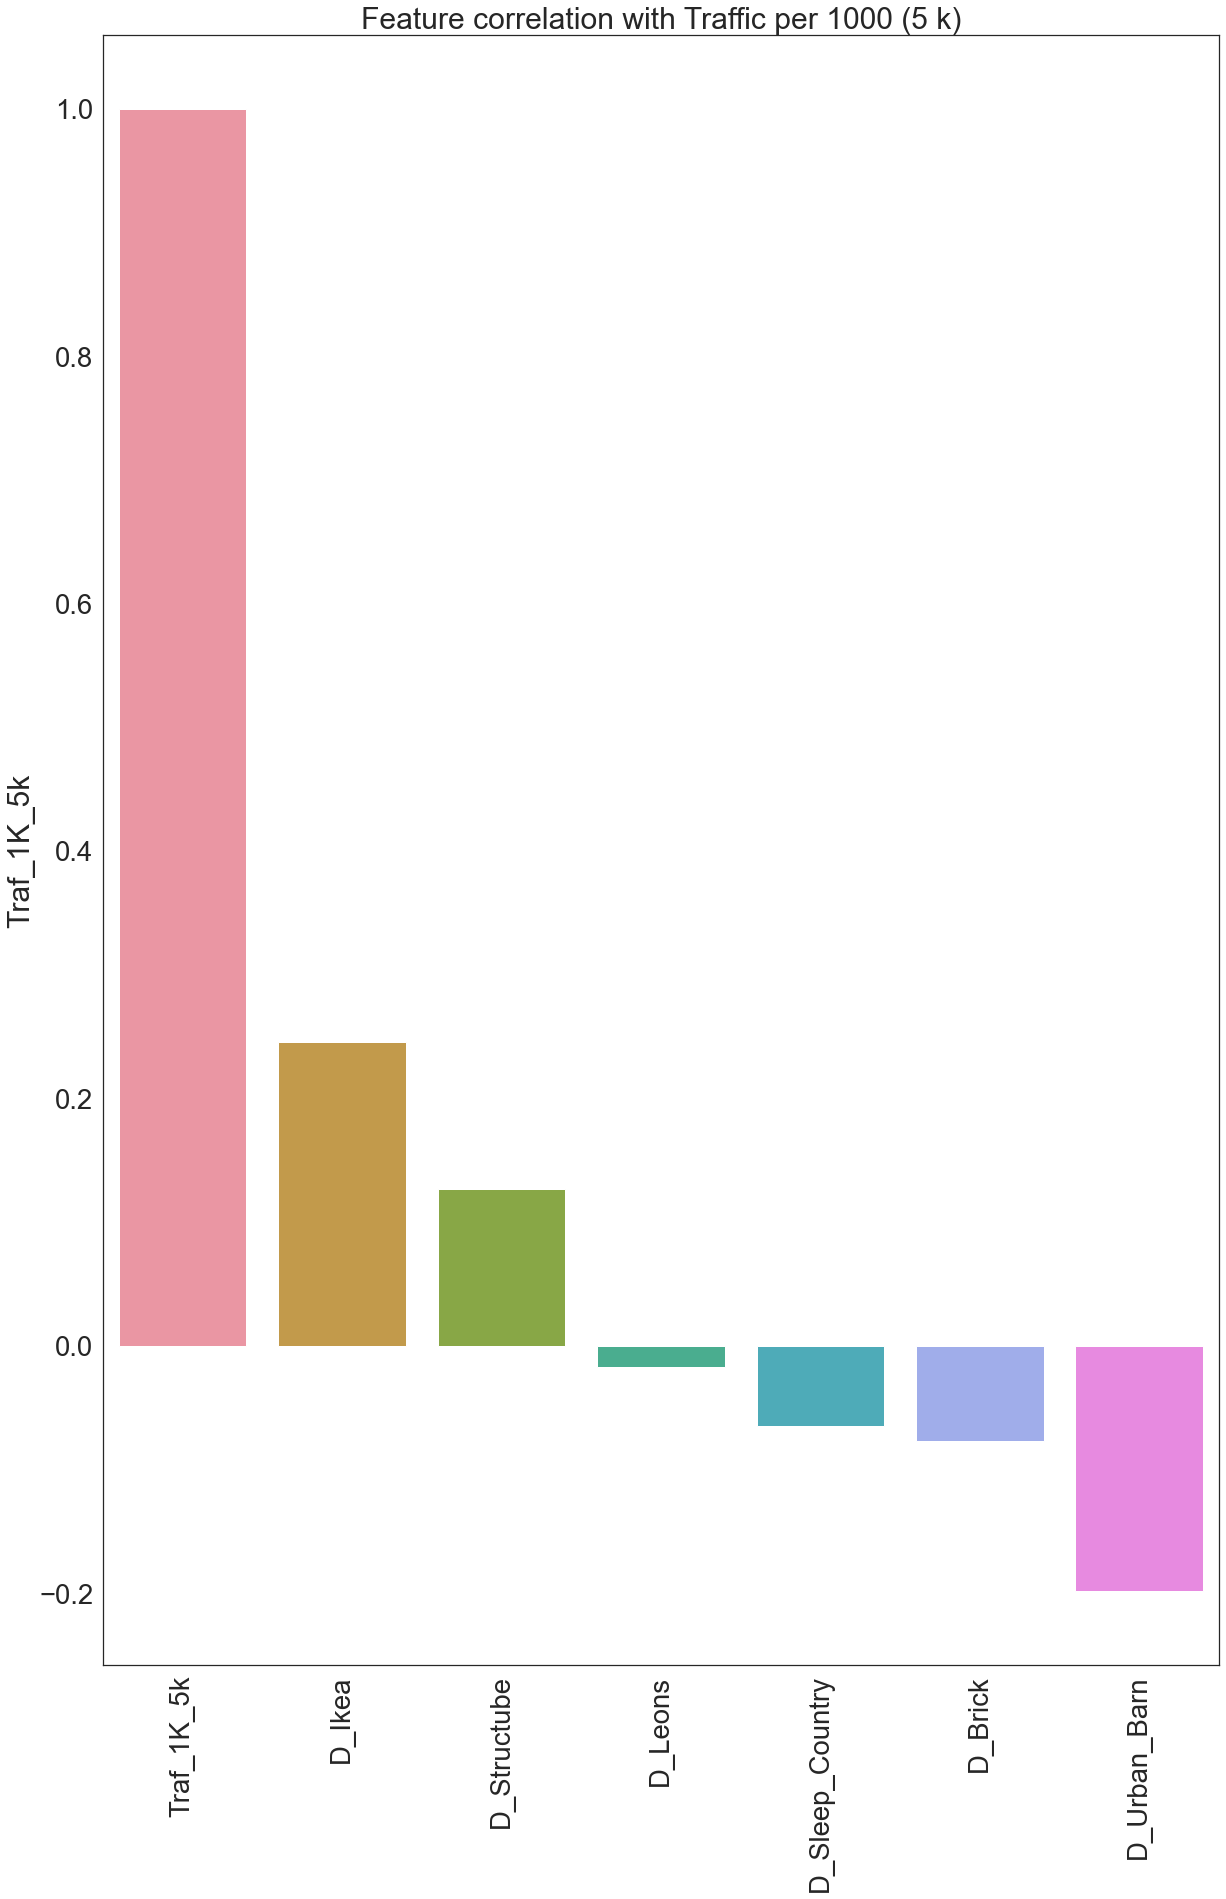

In [71]:
for t in traf_1K_5k:
    
    corr = dis_traf_1K_5k.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic per 1000 (5 k)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Distance.png')

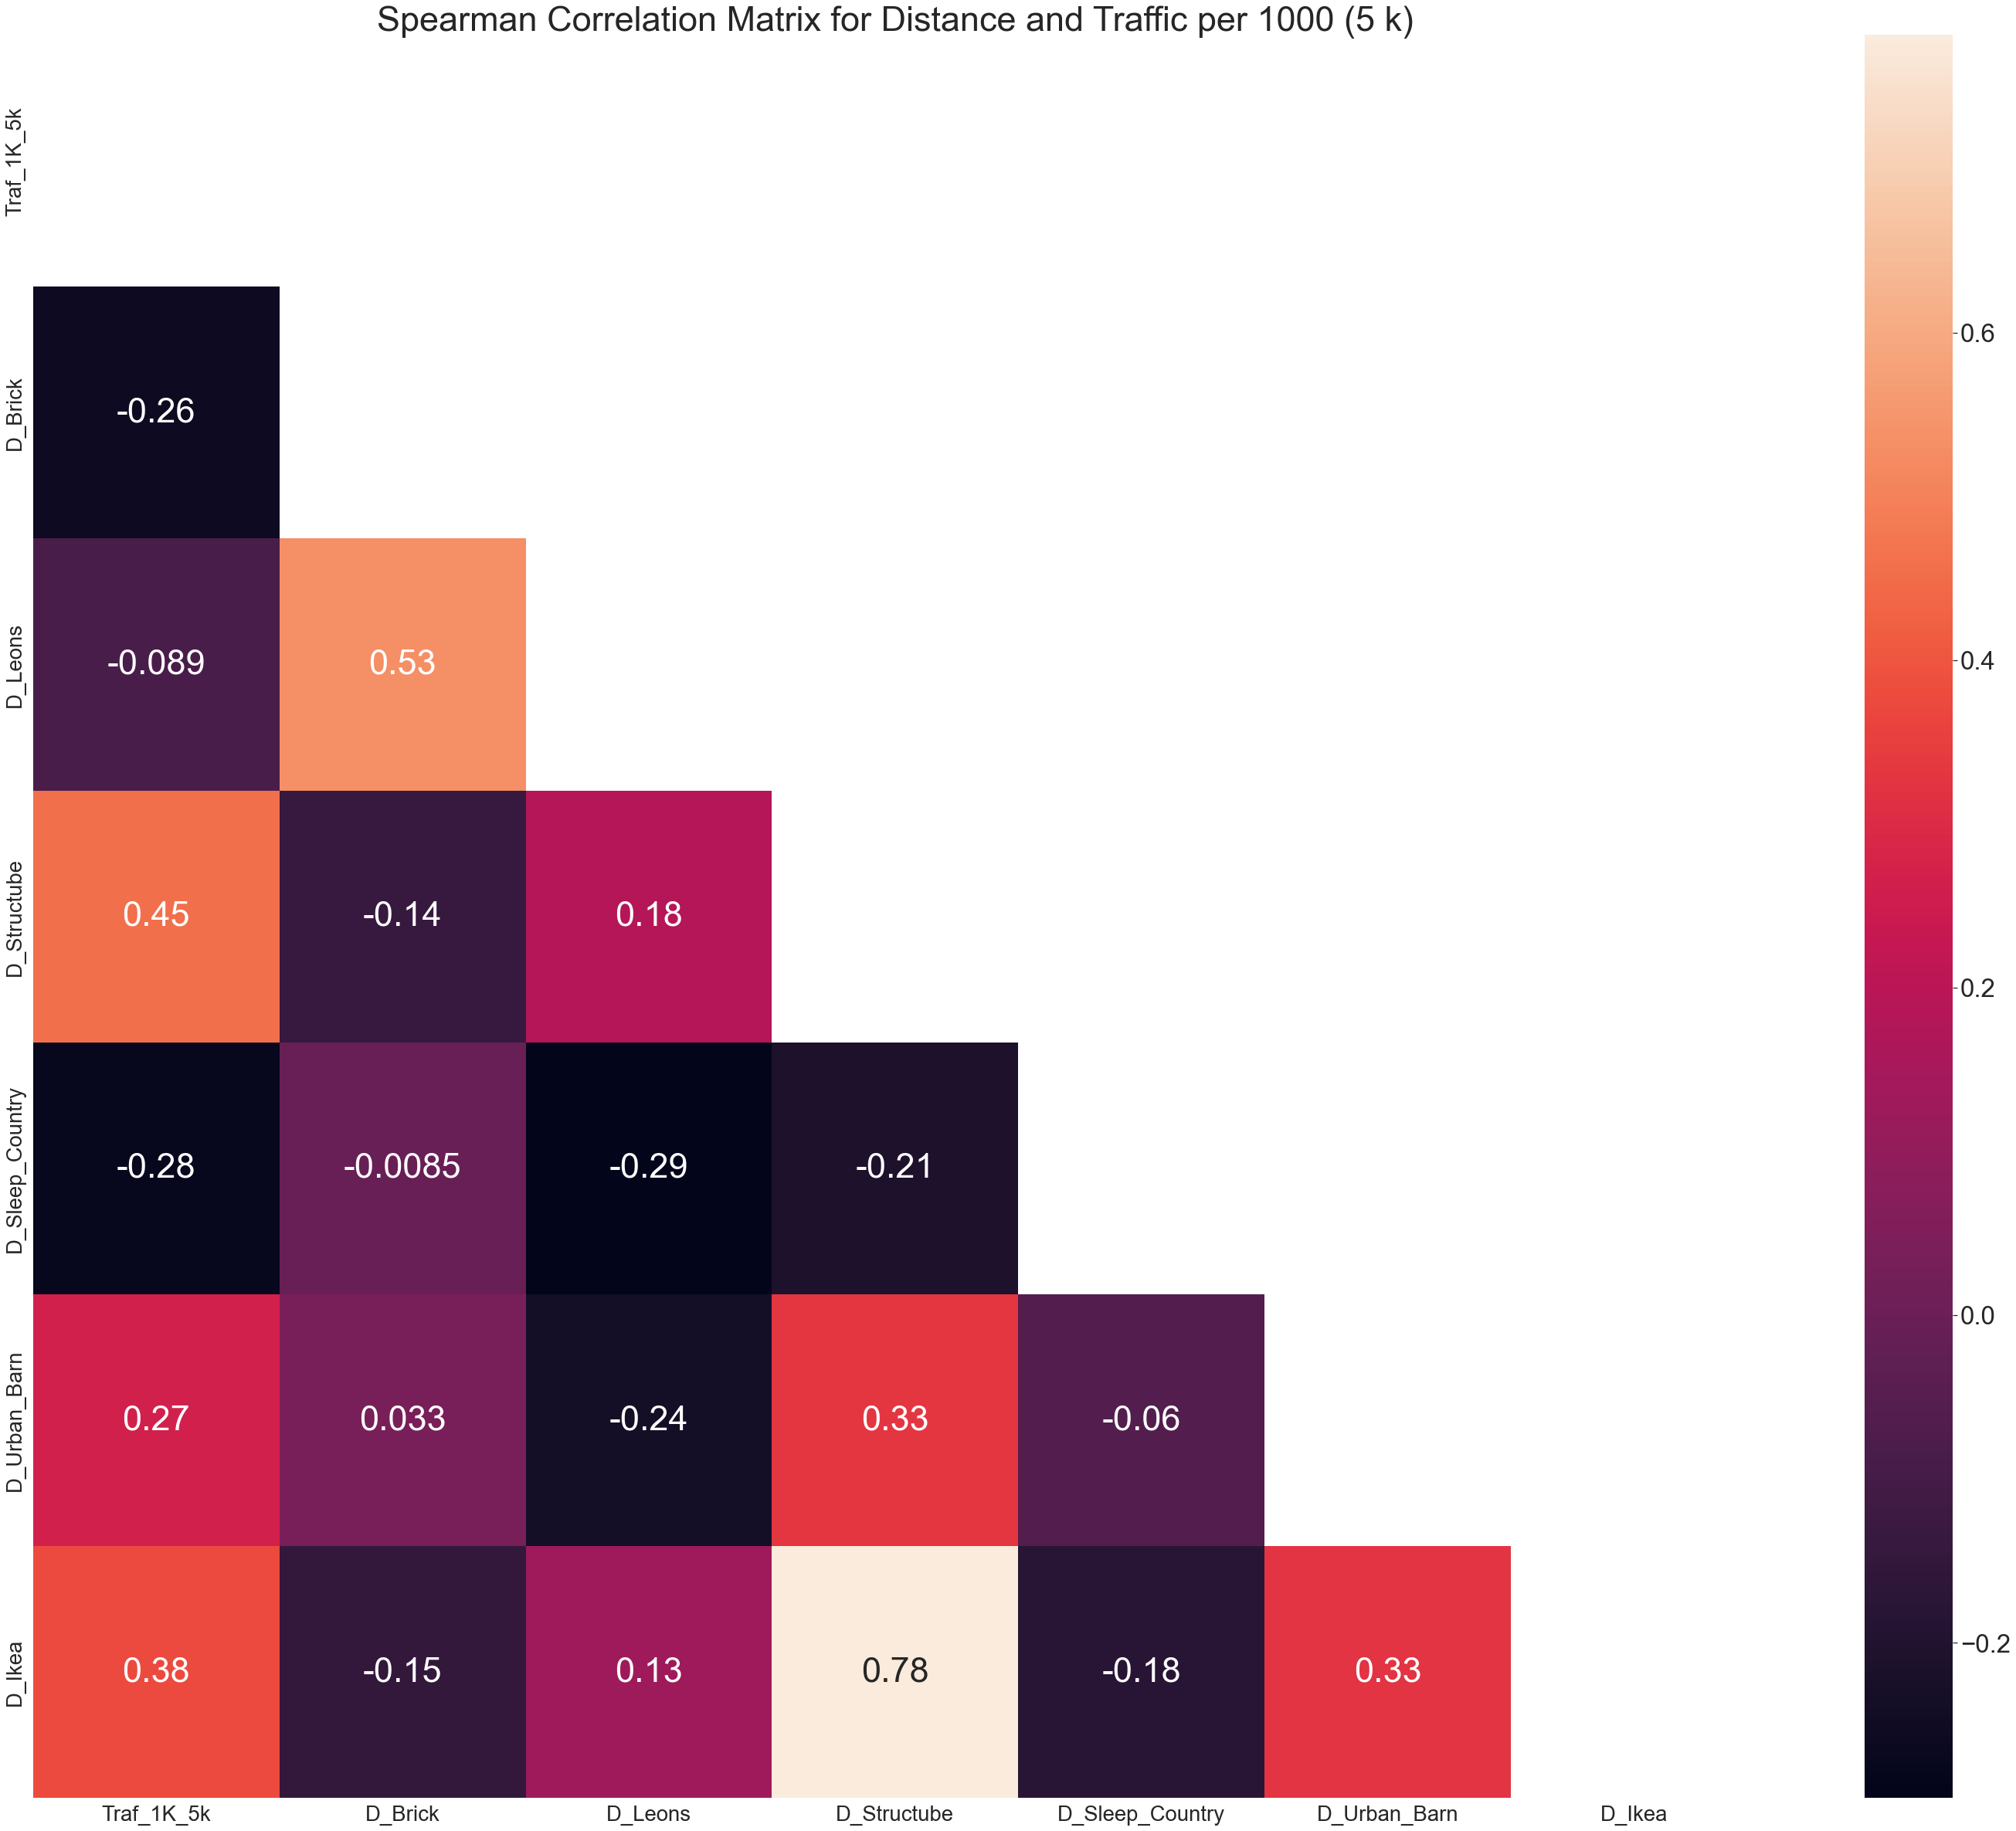

In [72]:
my_mask = np.zeros_like(dis_traf_1K_5k.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Distance and Traffic per 1000 (5 k)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dis_traf_1K_5k.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

### Traf_21_22 vs. Distance

In [73]:
dis_traf_21_22 =  my_df[['Traf_21_22', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

traf_21_22 = ['Traf_21_22'] 

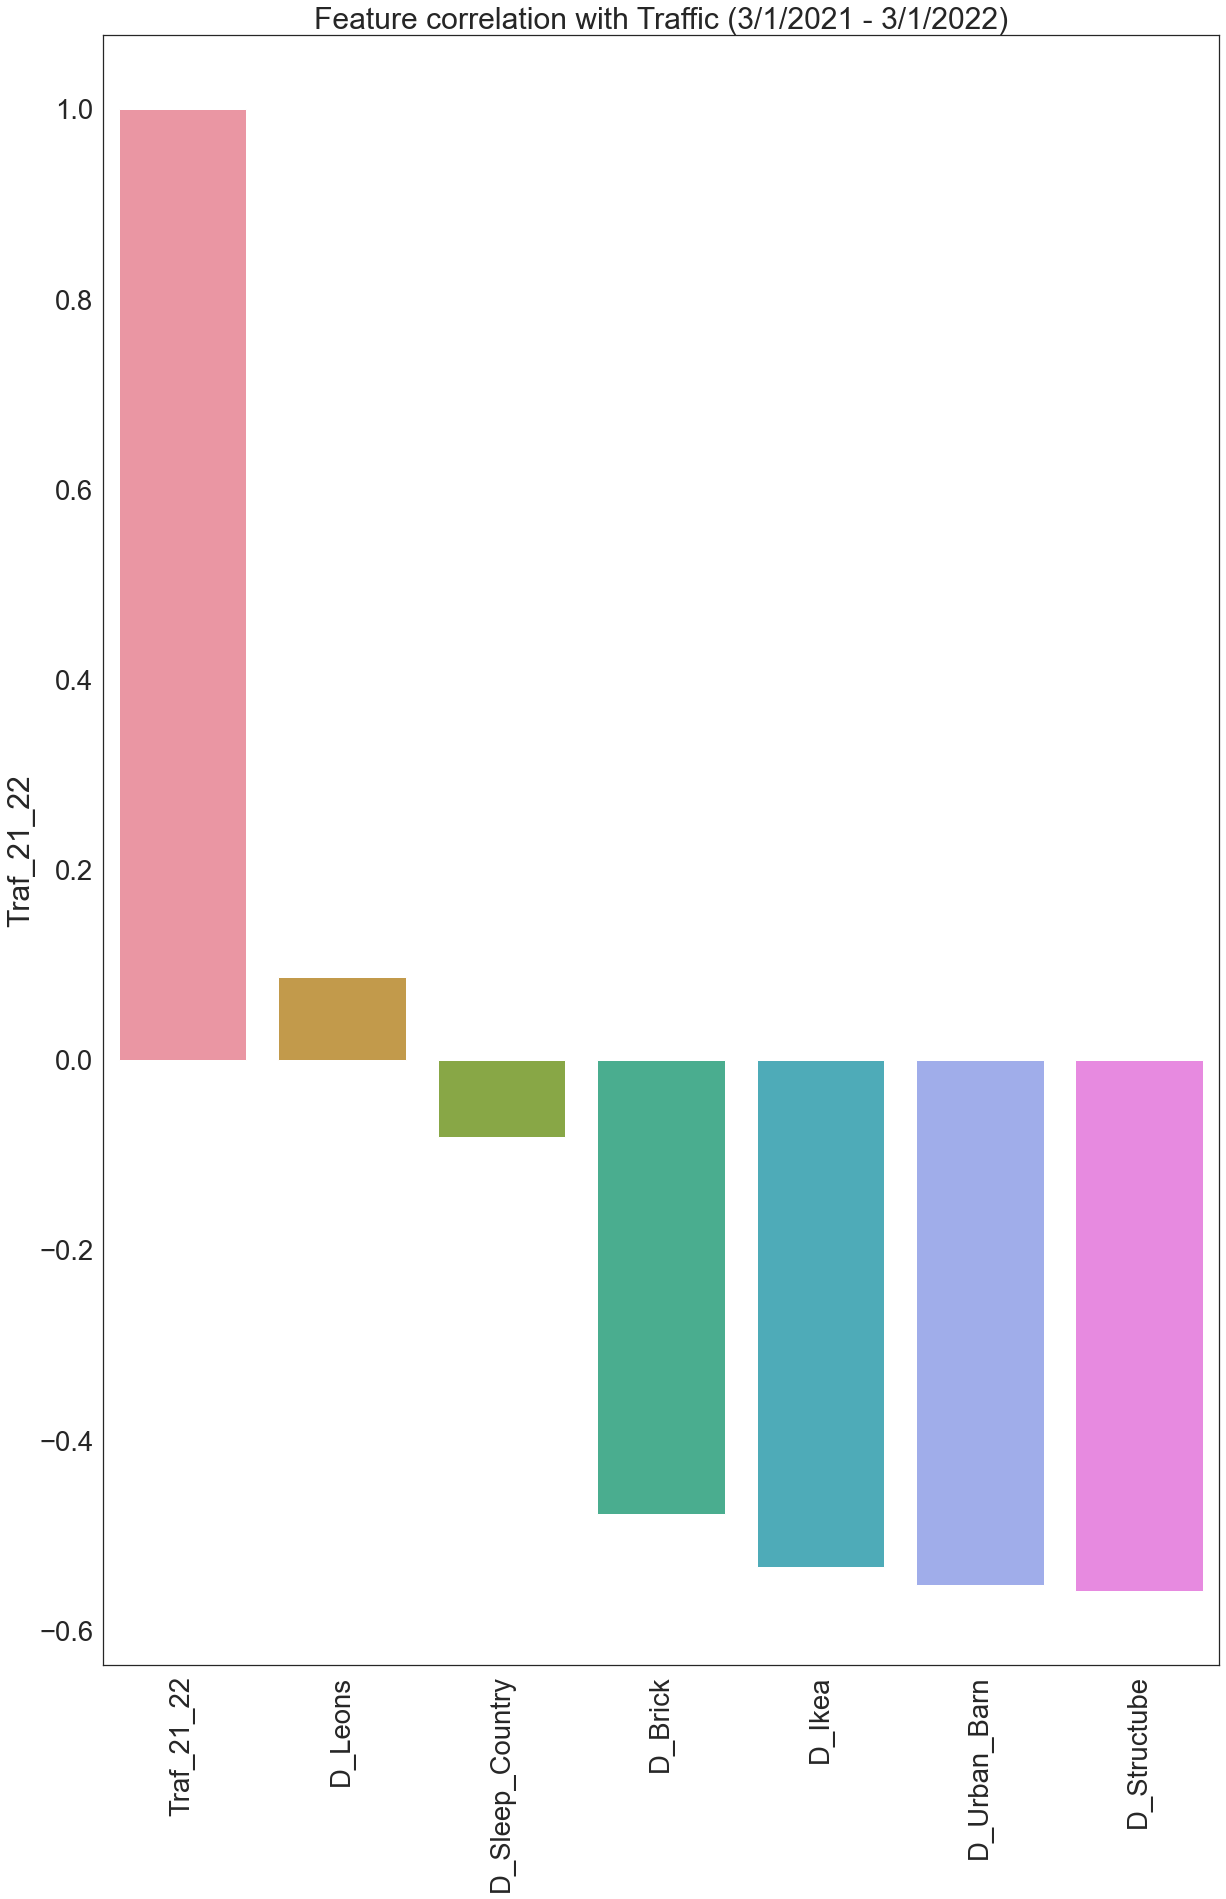

In [74]:
for t in traf_21_22:
    
    corr = dis_traf_21_22.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Traffic (3/1/2021 - 3/1/2022)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Distance.png')

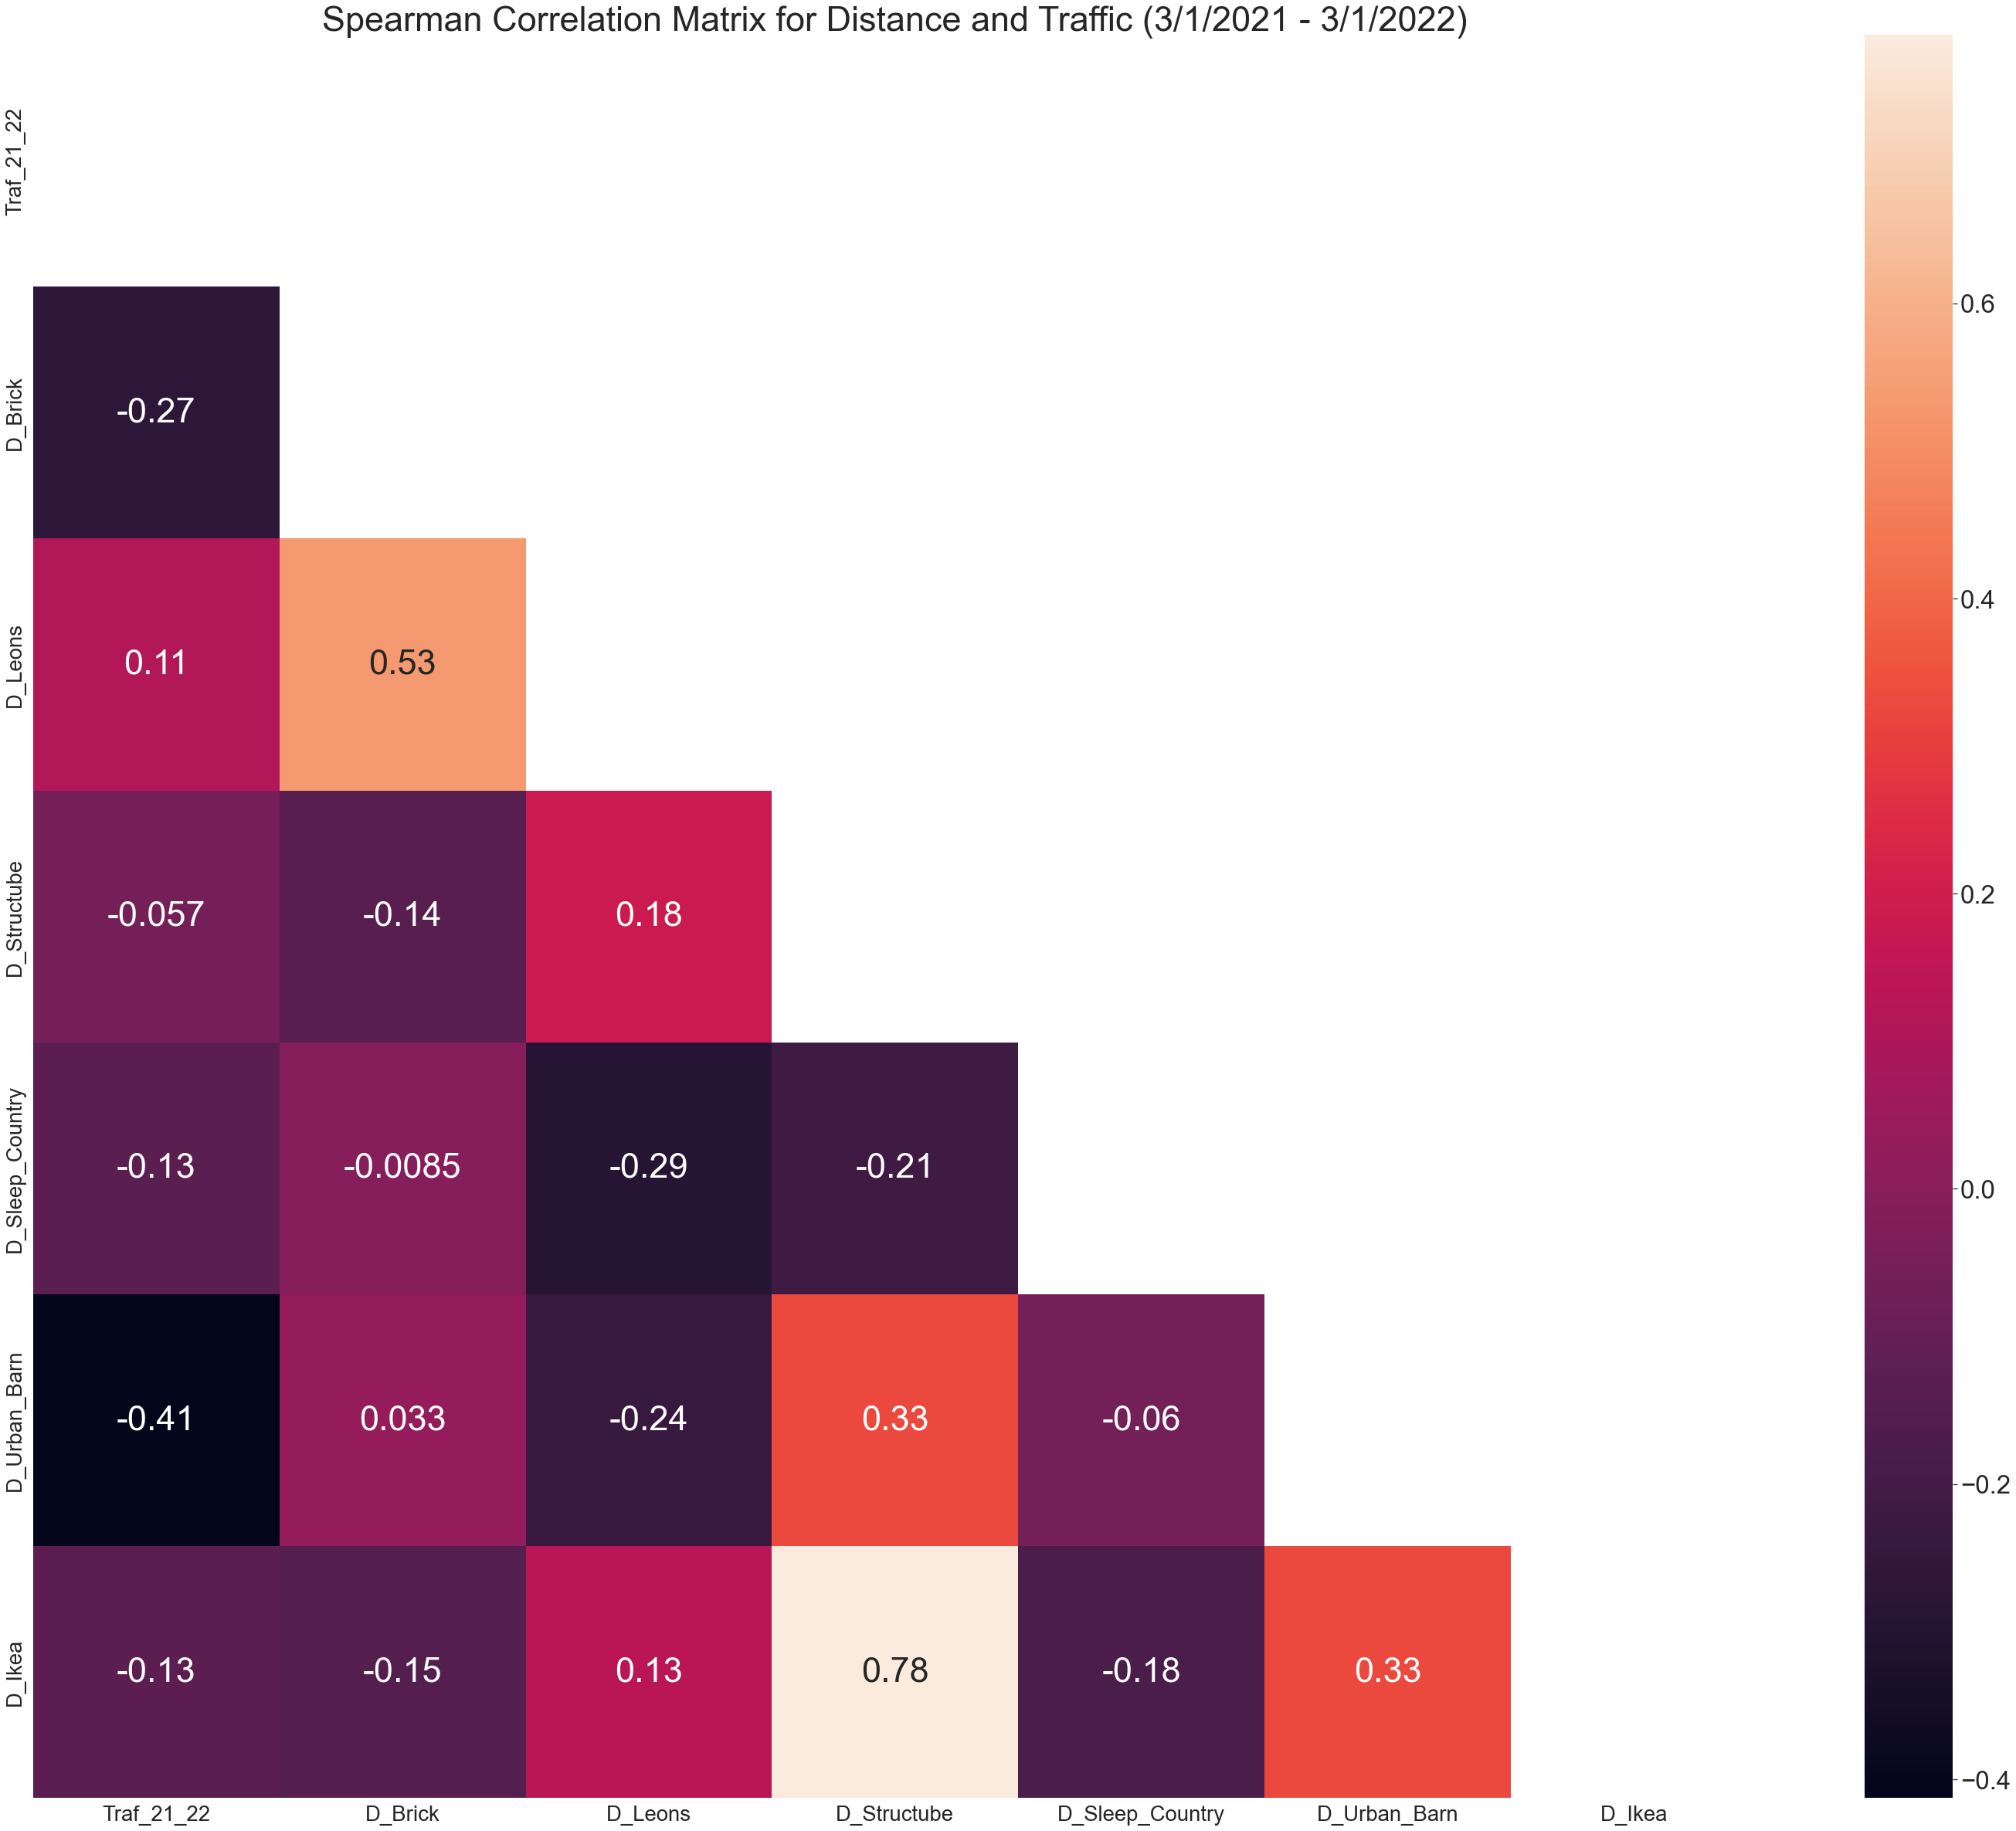

In [75]:
my_mask = np.zeros_like(dis_traf_21_22.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Distance and Traffic (3/1/2021 - 3/1/2022)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dis_traf_21_22.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

### Sal_21_22 vs. Distance

In [76]:
dist_Sal_21_22 =  my_df[['Sal_21_22', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

Sal_21_22 = ['Sal_21_22'] 

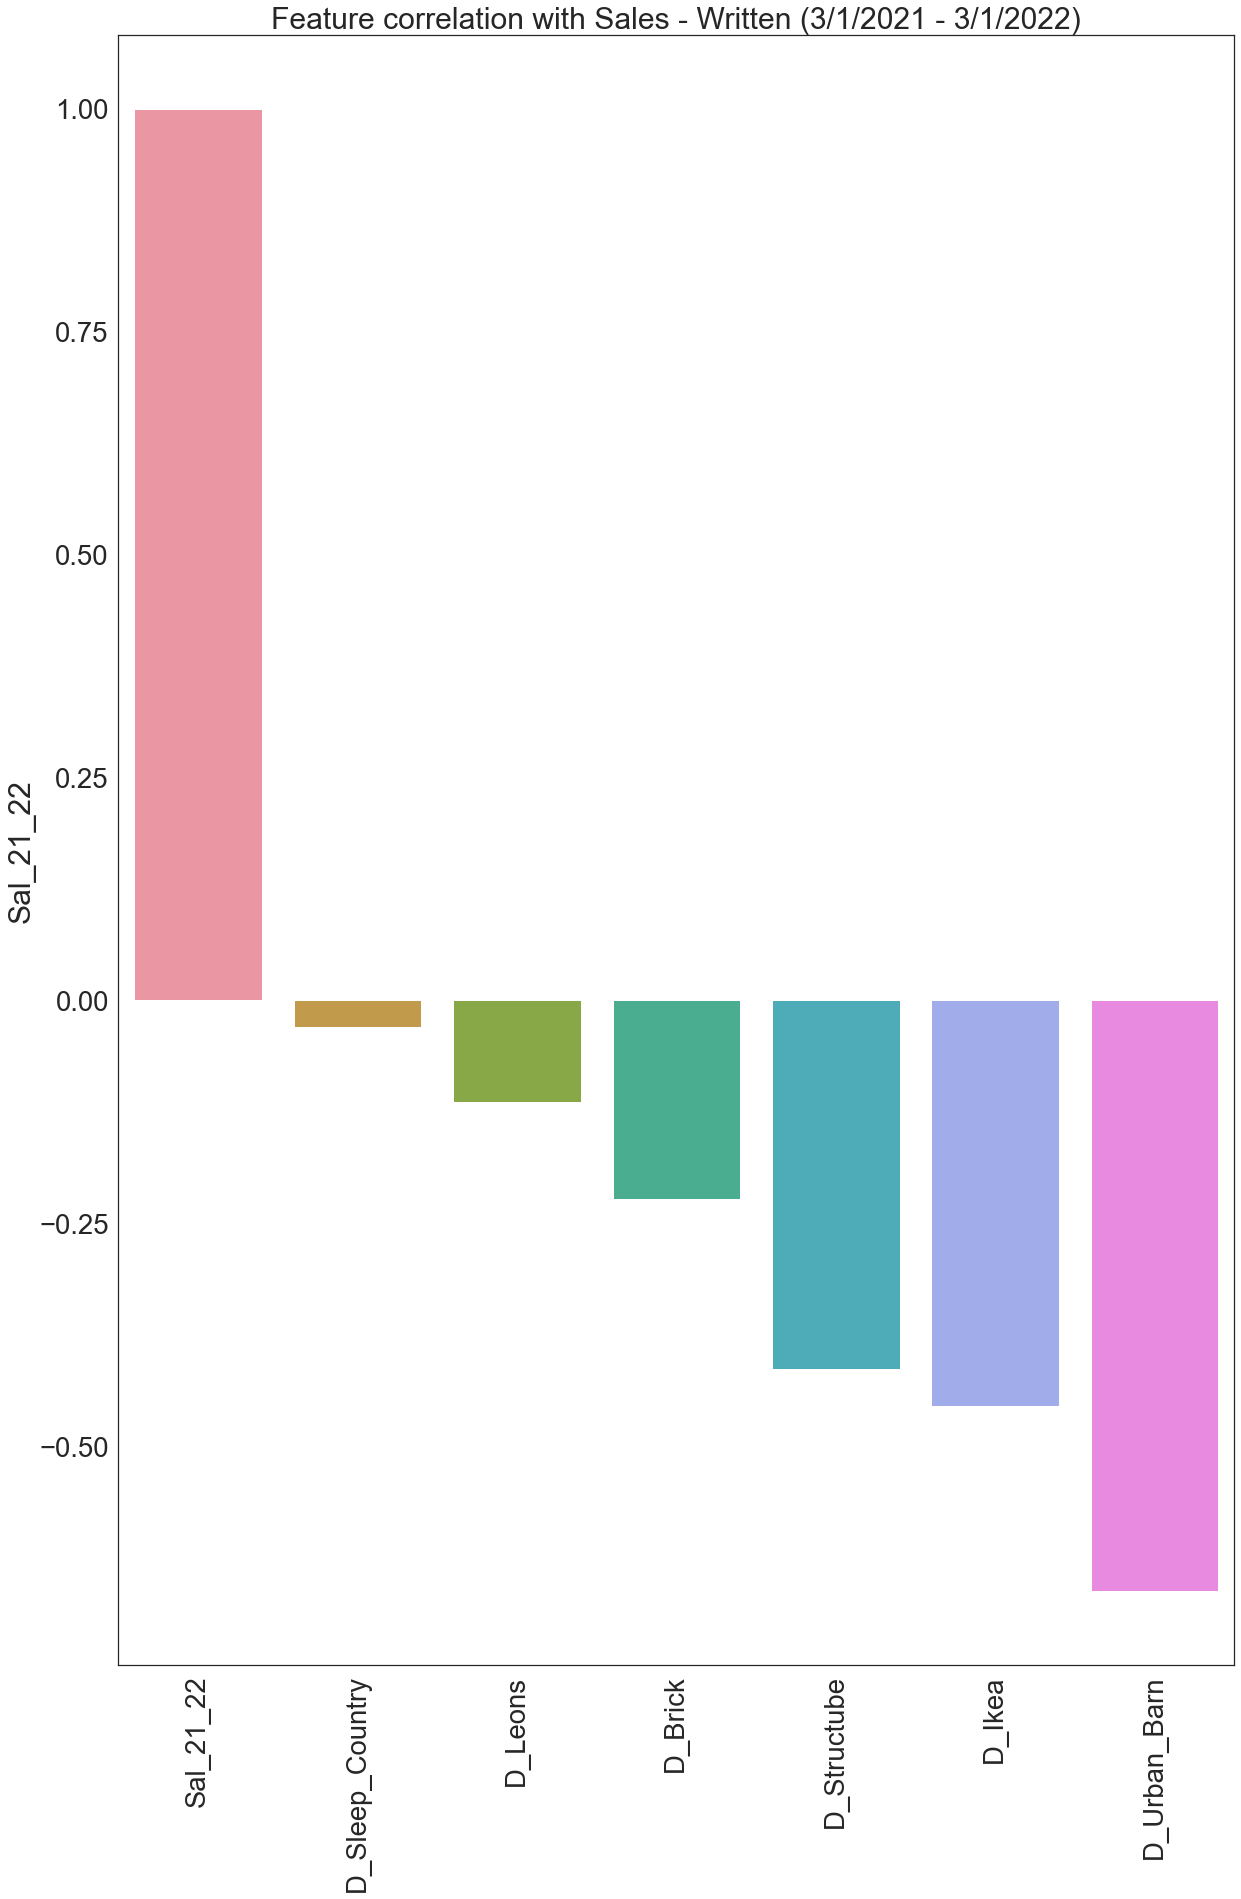

In [77]:
for t in Sal_21_22:
    
    corr = dist_Sal_21_22.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Sales - Written (3/1/2021 - 3/1/2022)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\\Competiotors_Location_Data_correlation_{t}_Distance.png')

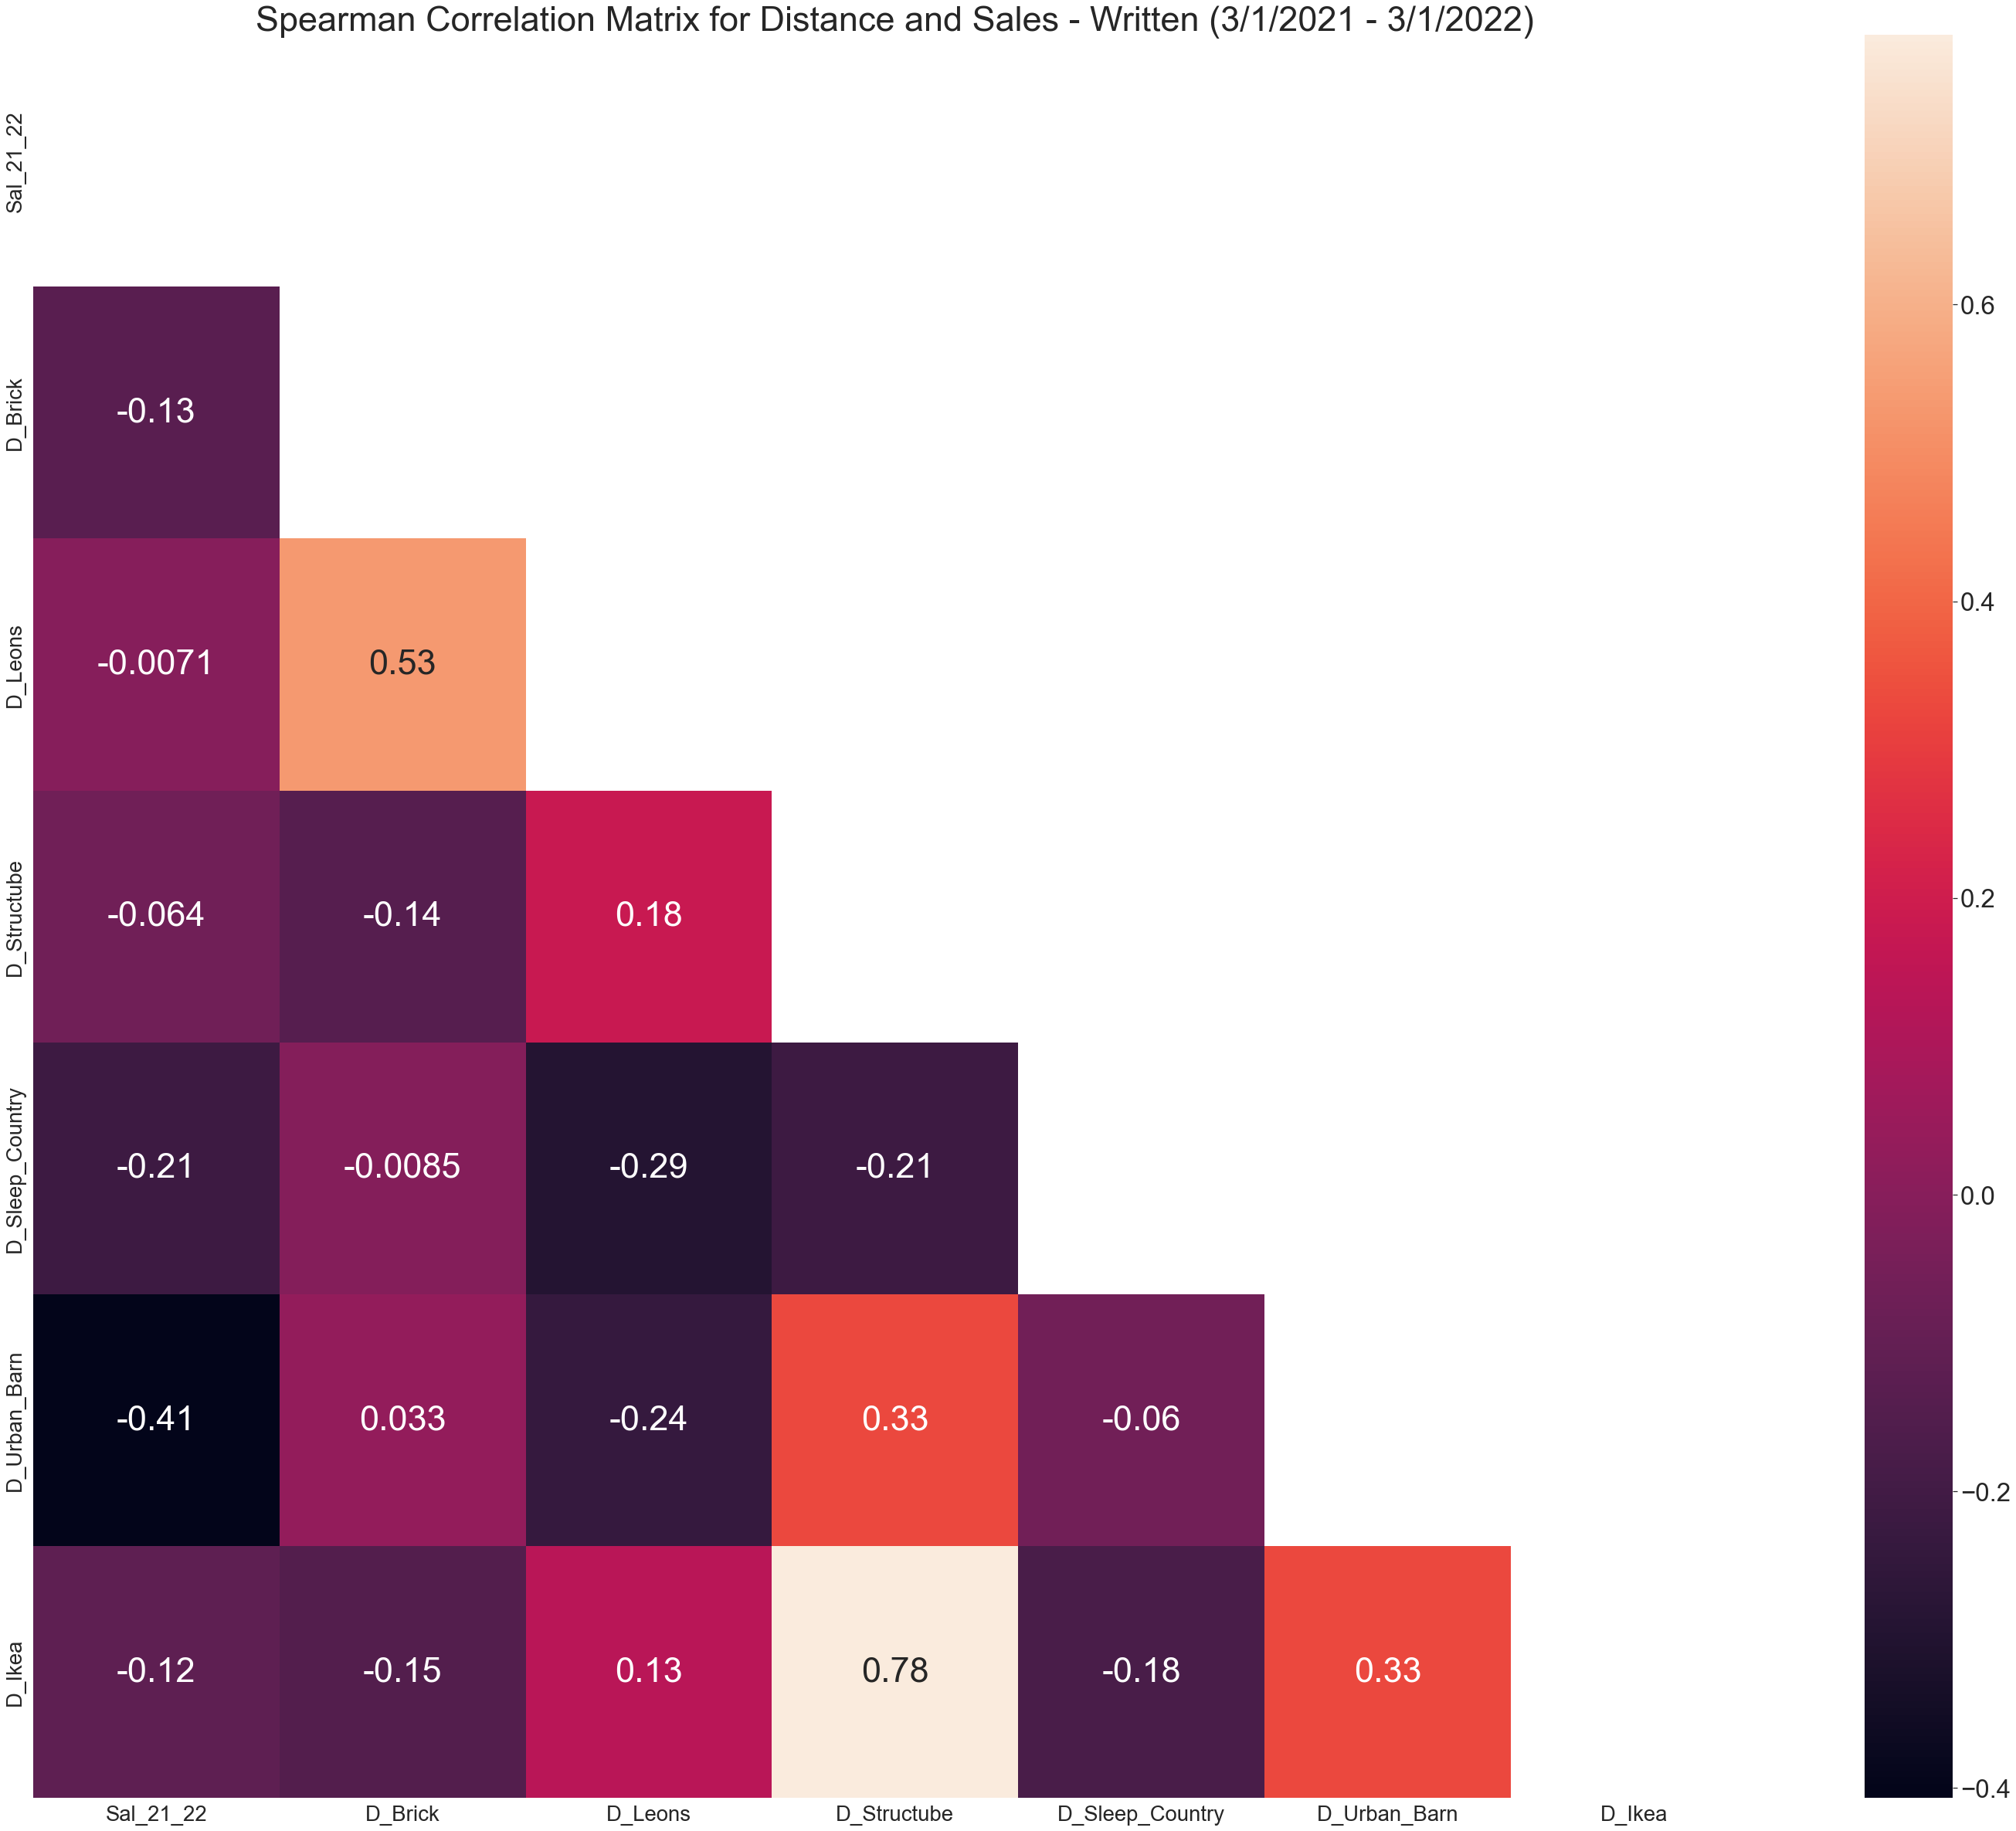

In [78]:
my_mask = np.zeros_like(dist_Sal_21_22.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(50, 42))
plt.title('Spearman Correlation Matrix for Distance and Sales - Written (3/1/2021 - 3/1/2022)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dist_Sal_21_22.corr(),annot=True,annot_kws={"size":45},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

### Sal_capita_cty vs. Distance

In [79]:
dis_Sal_capita_cty =  my_df[['Sal_capita_cty', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

Sal_capita_cty = ['Sal_capita_cty'] 

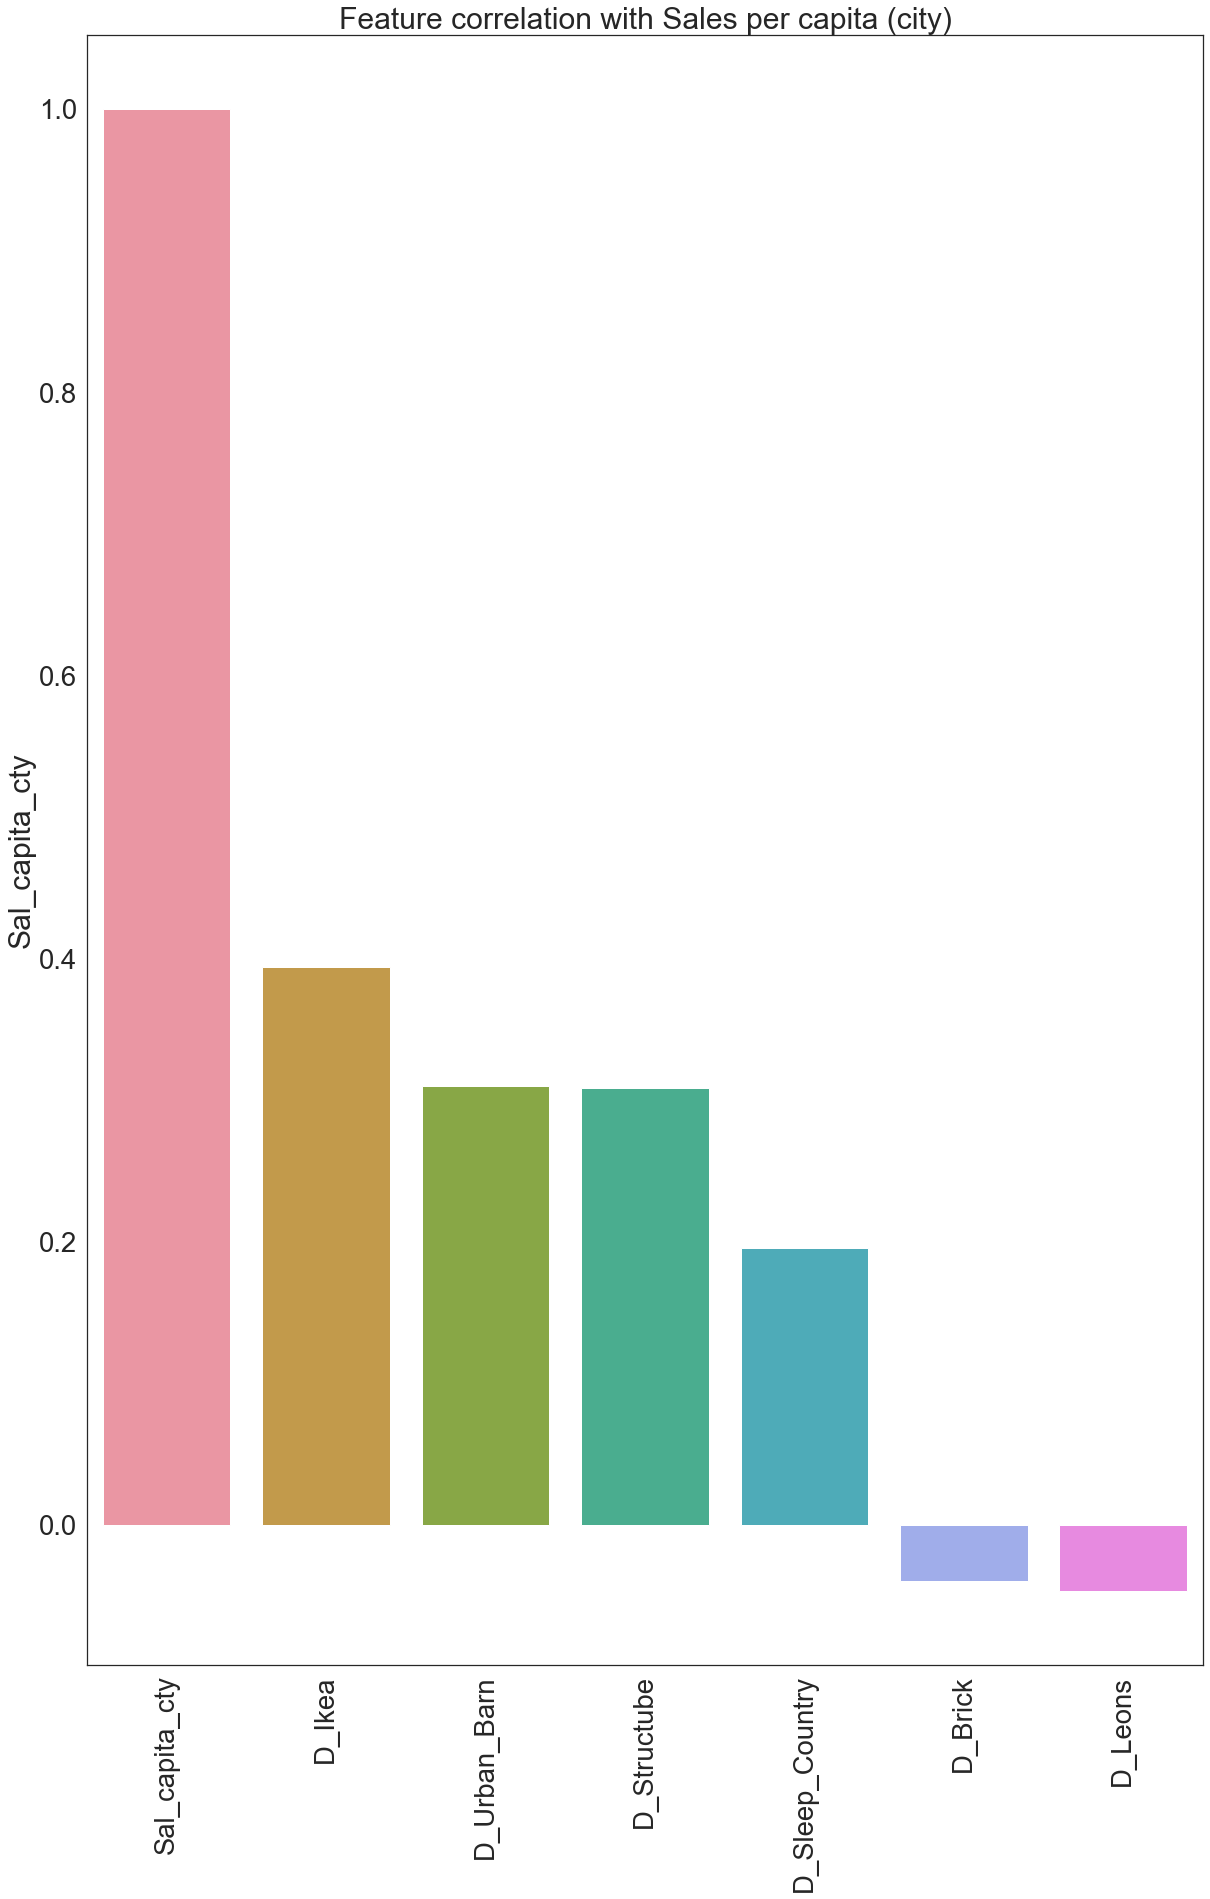

In [80]:
for t in Sal_capita_cty:
    
    corr = dis_Sal_capita_cty.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Sales per capita (city)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\Competiotors_Location_Data_correlation_{t}_Distance.png')

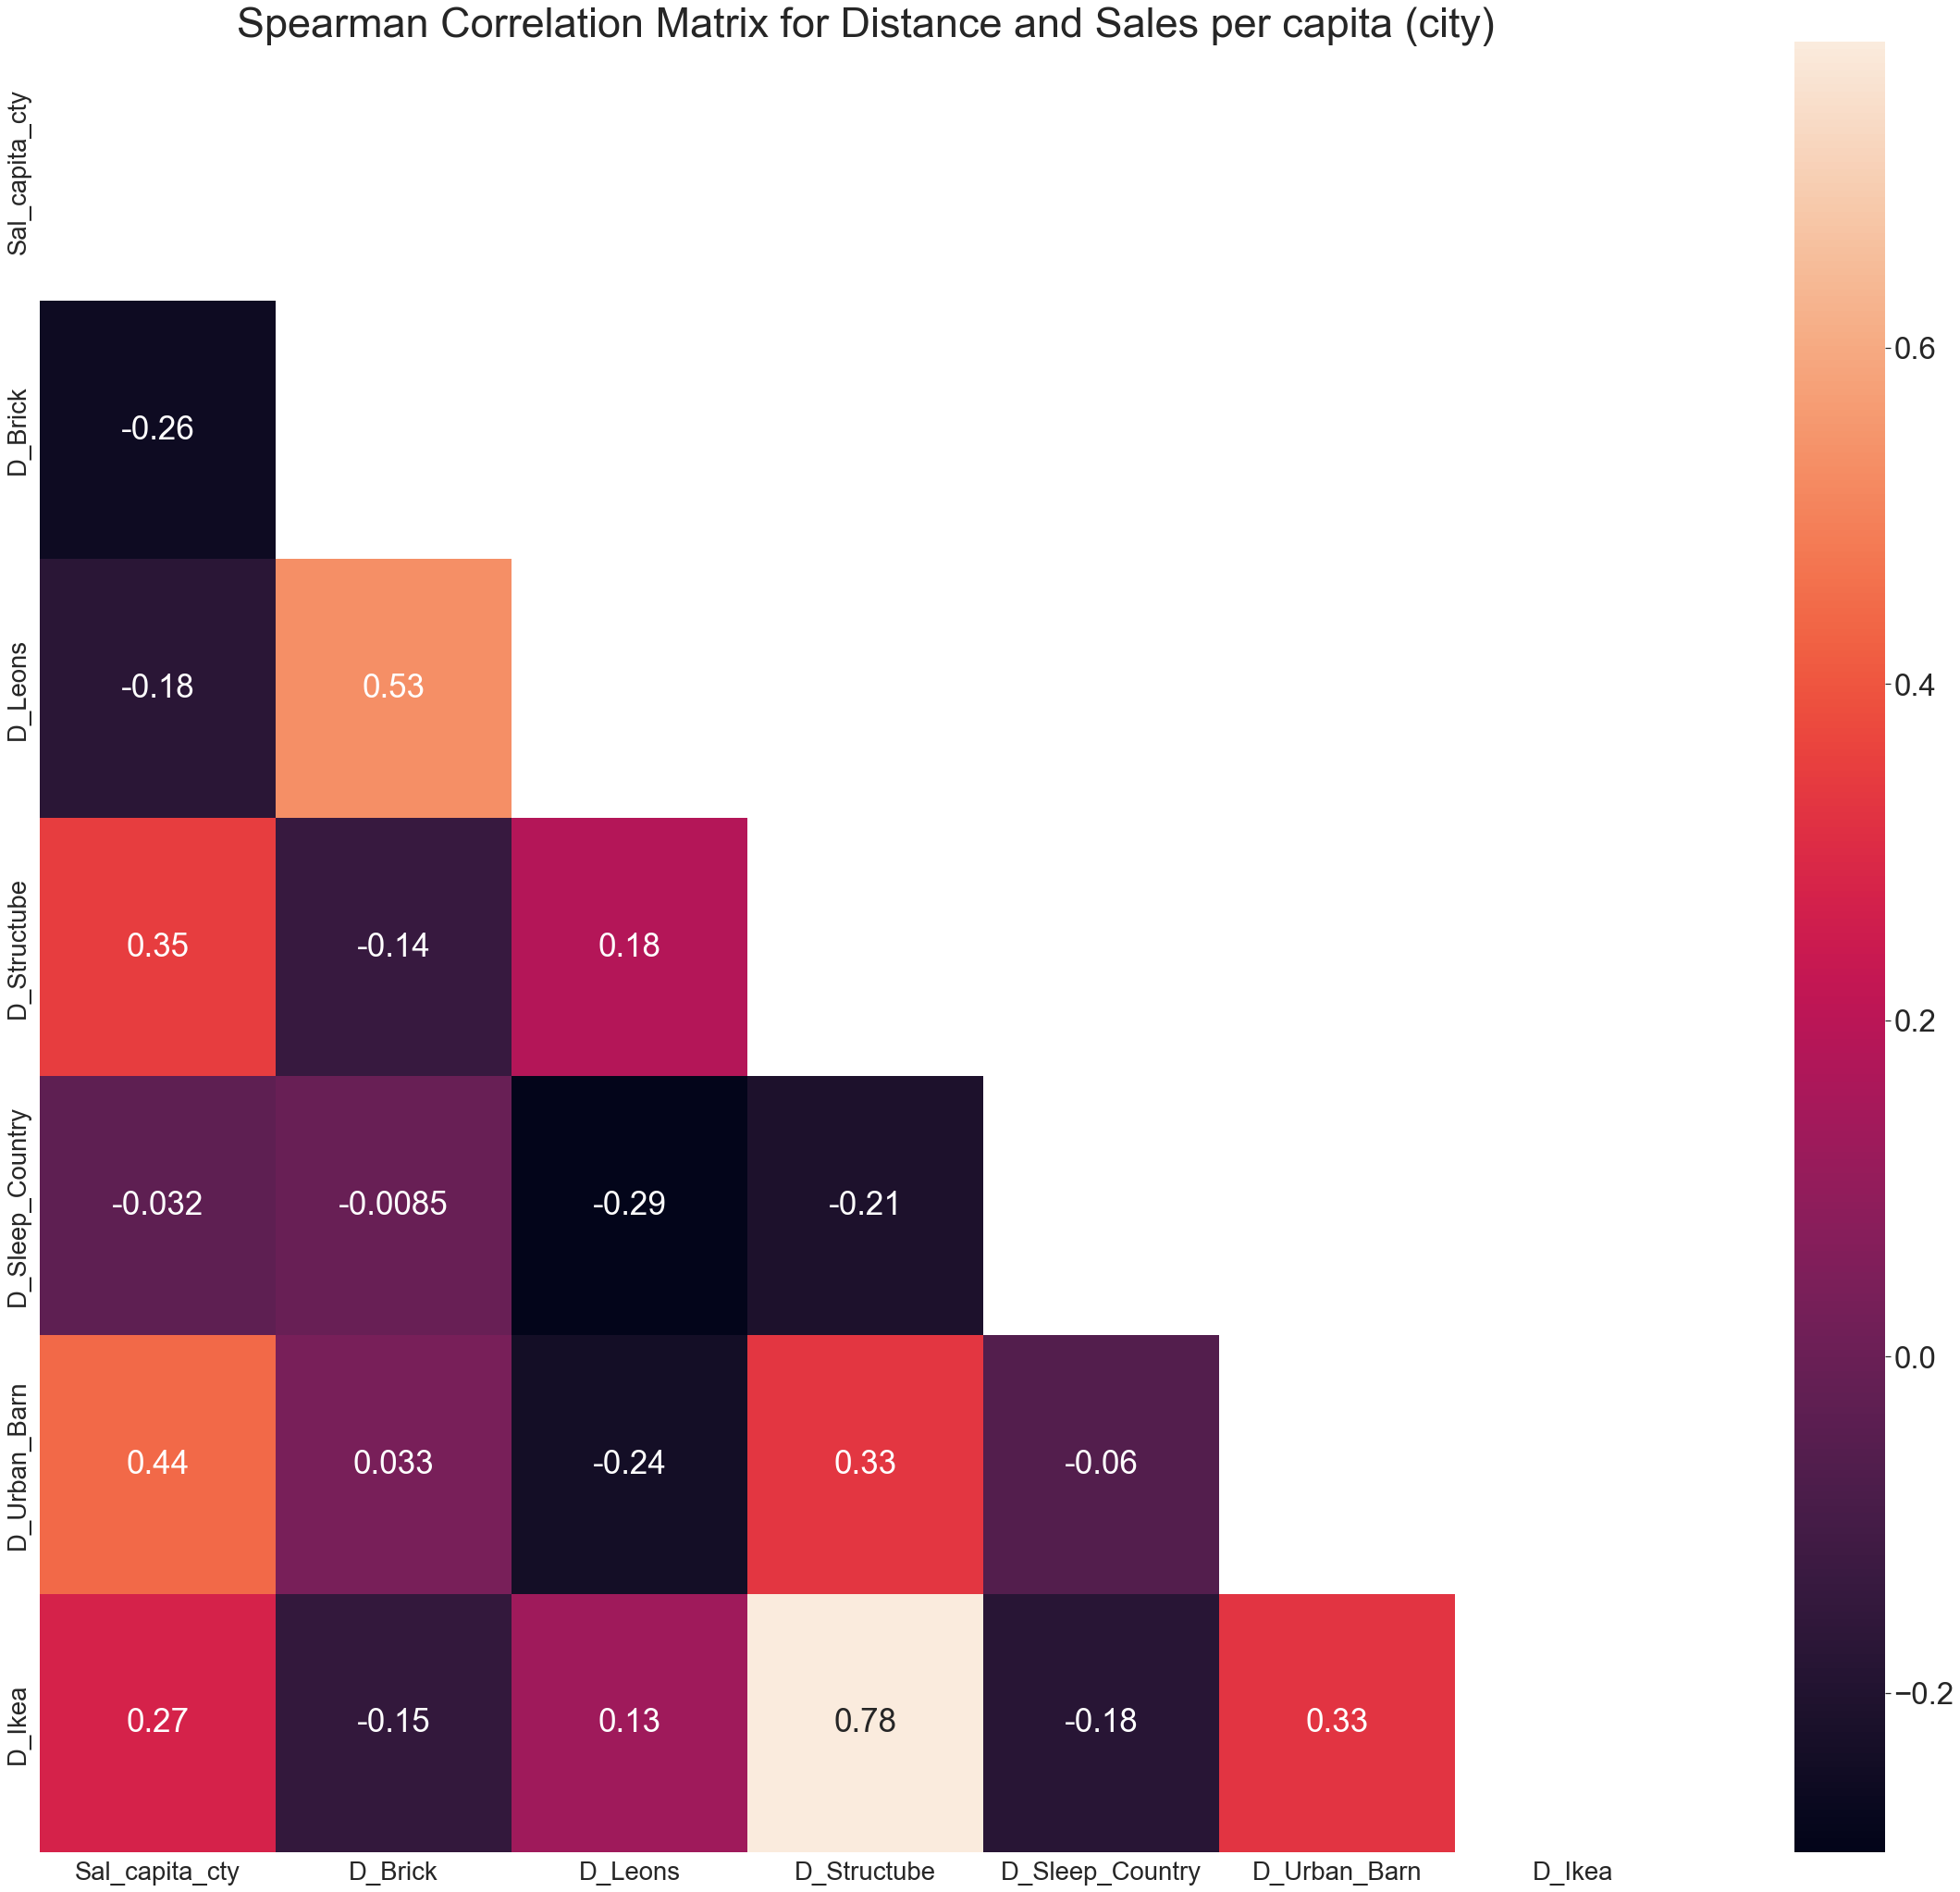

In [81]:
my_mask = np.zeros_like(dis_Sal_capita_cty.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix for Distance and Sales per capita (city)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dis_Sal_capita_cty.corr(),annot=True,annot_kws={"size":35},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

### Sal_capita_5K vs. Distance

In [82]:
dist_Sal_capita_5K =  my_df[['Sal_capita_5K', 'D_Brick', 'D_Leons',
       'D_Structube', 'D_Sleep_Country', 'D_Urban_Barn', 'D_Ikea']]

Sal_capita_5K = ['Sal_capita_5K'] 

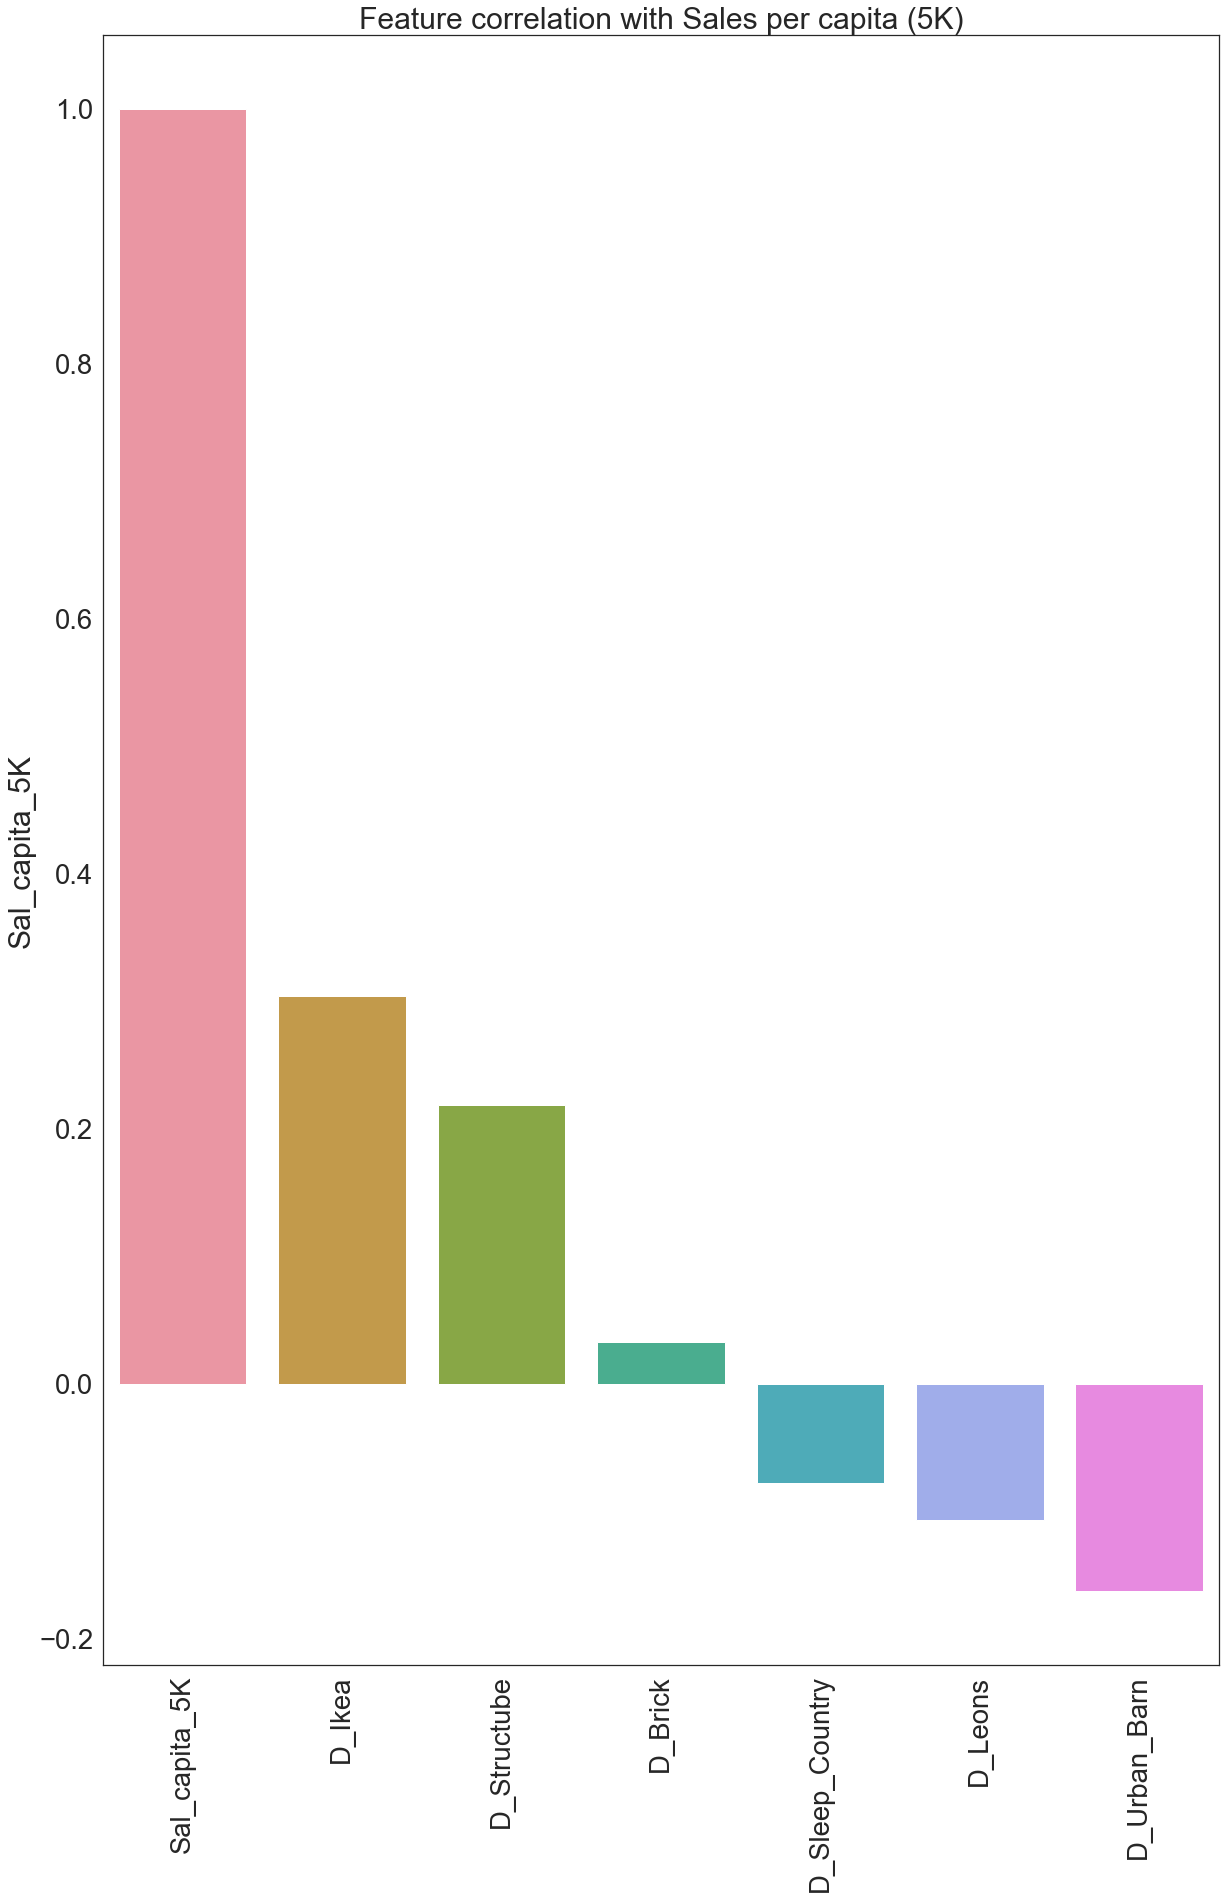

In [83]:
for t in Sal_capita_5K:
    
    corr = dist_Sal_capita_5K.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=2.5)
    plt.figure(figsize = (20,30))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with Sales per capita (5K)')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{figures_path}\Competiotors_Location_Data_correlation_{t}_Distance.png')

In [ ]:
my_mask = np.zeros_like(dist_Sal_capita_5K.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True #

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix for Distance and Sales per capita (5K)',fontsize=45)

sns.set(style="white", font_scale=3)

# sns.heatmap(cotenant_traffic_df.corr(),linewidths=0.25,vmax=0.7,square=True, #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":24},cbar_kws={"shrink": .5});

sns.heatmap(dist_Sal_capita_5K.corr(),annot=True,annot_kws={"size":35},mask=my_mask);

plt.savefig(f'{figures_path}\\Competitors_Location_Heatmap_{t}_Distance.png')

In [ ]:
'Traffic (3/1/2021 - 3/1/2022)',
       'Traffic per 1000 (city population)', 'Traffic per 1000 (5 k)',
       'Max of traffic per 1000 (city and 5k)',
       'Sales - Written (3/1/2021 - 3/1/2022)', 'Sales per capita (city)',
       'Sales per capita (5K)',

In [ ]:
size_df = my_df[['Traffic_per_1000_city_pop','Sales_per_capita_city', 'Size_L', 'Size_M', 'Size_S']] 

In [ ]:
size_target = ['Traffic_per_1000_city_pop','Sales_per_capita_city'] 

In [ ]:
for t in size_target:
    
    corr = size_df.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=1)
    plt.figure(figsize = (20,20))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{path}\Competiotors_Location_Data_correlation_{t}_Size.jpeg')

In [ ]:
my_mask = np.zeros_like(size_df.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True 

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix',fontsize=25)

sns.set(style="white", font_scale=2)

# sns.heatmap(my_df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":8},mask=my_mask,cbar_kws={"shrink": .9});

sns.heatmap(size_df.corr(),annot=True,annot_kws={"size":24},mask=my_mask);

plt.savefig(f'{path}\\Competitors_Location_Data_correlation_Distance.jpeg')

## Correlations with the size of Regions

In [ ]:
region_sales_df = my_df[['SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
       'Sales_per_capita_5K','Total_Occ_PSF_22_budg', 'Region_Barrie', 'Region_Brampton', 'Region_Brandon',
       'Region_Brantford', 'Region_Brentwood', 'Region_Burlington',
       'Region_Calgary North', 'Region_Calgary South', 'Region_Edmonton South',
       'Region_Edmonton West', 'Region_Guelph', 'Region_Hamilton',
       'Region_Heartland', 'Region_Lethbridge', 'Region_London',
       'Region_Medicine Hat', 'Region_New Market', 'Region_Ottawa',
       'Region_Red Deer', 'Region_Regina', 'Region_Richmond Hill',
       'Region_Saskatoon', 'Region_Scarborough', 'Region_Vaughan',
       'Region_Whitby', 'Region_Windsor', 'Region_Winnipeg East',
       'Region_Winnipeg West']] 

In [ ]:
region_traffic_df = my_df[['Traffic_per_1000_city_pop','Traffic_jan3_21_jan3_22', 
       'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k', 'Region_Barrie', 'Region_Brampton', 'Region_Brandon',
       'Region_Brantford', 'Region_Brentwood', 'Region_Burlington',
       'Region_Calgary North', 'Region_Calgary South', 'Region_Edmonton South',
       'Region_Edmonton West', 'Region_Guelph', 'Region_Hamilton',
       'Region_Heartland', 'Region_Lethbridge', 'Region_London',
       'Region_Medicine Hat', 'Region_New Market', 'Region_Ottawa',
       'Region_Red Deer', 'Region_Regina', 'Region_Richmond Hill',
       'Region_Saskatoon', 'Region_Scarborough', 'Region_Vaughan',
       'Region_Whitby', 'Region_Windsor', 'Region_Winnipeg East',
       'Region_Winnipeg West']] 

In [ ]:
sales = ['SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
       'Sales_per_capita_5K','Total_Occ_PSF_22_budg']
traffic = ['Traffic_per_1000_city_pop','Traffic_jan3_21_jan3_22', 
       'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k'] 

In [ ]:
for t in traffic:
    
    corr = region_traffic_df.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=1)
    plt.figure(figsize = (20,20))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{path}\Competiotors_Location_Data_correlation_{t}_Distance_Region.jpeg')

In [ ]:
my_mask = np.zeros_like(region_traffic_df.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True 

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix',fontsize=25)

sns.set(style="white", font_scale=2)

# sns.heatmap(my_df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":8},mask=my_mask,cbar_kws={"shrink": .9});

sns.heatmap(region_traffic_df.corr(),annot=True,annot_kws={"size":24},mask=my_mask);

plt.savefig(f'{path}\\Competitors_Location_Data_correlation_Distance_Region.jpeg')

In [ ]:
for t in sales:
    
    corr = region_sales_df.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=1)
    plt.figure(figsize = (20,20))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{path}\Competiotors_Location_Data_correlation_{t}_Region.jpeg')

In [ ]:
my_mask = np.zeros_like(region_sales_df.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True 

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix',fontsize=25)

sns.set(style="white", font_scale=2)

# sns.heatmap(my_df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":8},mask=my_mask,cbar_kws={"shrink": .5});

sns.heatmap(region_sales_df.corr(),annot=True,annot_kws={"size":24},mask=my_mask);

plt.savefig(f'{path}\\Competitors_Location_Data_correlation_Region_Sales.jpeg')

In [ ]:
new_df = my_df[['City population', 'pop_5km', 'sq_ft', 'Total_Occ_PSF_22_budg',
       'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
       'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
       'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
       'Sales_per_capita_5K']]

In [ ]:
my_mask = np.zeros_like(new_df.corr(method='spearman'), dtype=np.bool) 
my_mask[np.triu_indices_from(my_mask)] = True 

f, ax = plt.subplots(figsize=(40, 36))
plt.title('Spearman Correlation Matrix',fontsize=12)

sns.set(style="white", font_scale=2)

# sns.heatmap(my_df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
#             linecolor='w',annot=True,annot_kws={"size":8},mask=my_mask,cbar_kws={"shrink": .5});

sns.heatmap(new_df.corr(),annot=True,annot_kws={"size":24},mask=my_mask);

plt.savefig(f'{path}\\Competitors_Location_Data_correlation_Traffic_Sales_Population.jpeg')

In [ ]:
for t in new_df.columns:
    
    corr = new_df.corr(method='spearman').loc[:,[t]]
    corr_df = pd.DataFrame(data = corr, index = corr.index ).sort_values (by = t, ascending = False)

    sns.set(style="white", font_scale=1)
    plt.figure(figsize = (20,20))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.title(f'Feature correlation with {t}')
    sns.barplot (data = corr_df, x = corr_df.index, y = t);

    plt.savefig(f'{path}\Competitors_Location_Data_correlation_{t}_Traffic_Sales_Population.jpeg')

In [ ]:
sns.set(style="white", font_scale=1)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
target=['Total_Occ_PSF_22_budg',
       'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
       'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
       'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
       'Sales_per_capita_5K']
target

In [ ]:
features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
       'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
       'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
       'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
       'Sales_per_capita_5K'])
features

In [ ]:
my_df.columns

## Simple Linear Regression

In [ ]:
# my_evaluation_simple_lr = pd.DataFrame({'Model': [],
#                            'Independent var':[],
#                            'Target var':[],             
#                            'Root Mean Squared Error (RMSE)':[],
#                            'R-squared (training)':[],
#                            'Adjusted R-squared (training)':[],
#                            'R-squared (test)':[],
#                            'MAPE':[],
#                            'Adjusted R-squared (test)':[],
#                            '5-Fold Cross Validation':[]})



# train_data,test_data = train_test_split(my_df,train_size = 0.8,random_state=42)
# # print(train_data.shape)

# # target=['Total_Occ_PSF_22_budg',
# #        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
# #        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
# #        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
# #        'Sales_per_capita_5K']
# # ind = my_df.columns.drop(['Total_Occ_PSF_22_budg',
# #        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
# #        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
# #        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
# #        'Sales_per_capita_5K'])

# for t in target:
#     for i in features:
        
#         ################### train-test #######################
#         X_train = np.array(train_data[i], dtype=pd.Series).reshape(-1,1)
#         y_train = np.array(train_data[t], dtype=pd.Series)
        

#         X_test = np.array(test_data[i], dtype=pd.Series).reshape(-1,1)
#         y_test = np.array(test_data[t], dtype=pd.Series)
        
#         print(X_train.shape, y_train.shape)
        
#         # specify model

#         lin_reg = LinearRegression()
#         lin_reg.fit(X_train, y_train)

#         # predict prices of X_test
#         y_pred = lin_reg.predict(X_test)

#         my_rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),'.3f'))
#         my_mapesm = float(format(metrics.mean_absolute_percentage_error(y_test,y_pred),'.3f'))
#         my_rtrsm = float(format(lin_reg.score(X_train, y_train),'.3f'))
#         my_rtesm = float(format(lin_reg.score(X_test, y_test),'.3f'))
# #         my_cv = float(format(cross_val_score(lin_reg,my_df[i],my_df[t],cv=5).mean(),'.3f'))
        
#         print("================================================")
#         print(f'Simple Linear Regression with {i} and {t}:')
#         print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
#         print('Intercept: {}'.format(lin_reg.intercept_))
#         print('Coefficient: {}'.format(lin_reg.coef_))

#         r = my_evaluation_simple_lr.shape[0]
#         my_evaluation_simple_lr.loc[r] = ['Simple Linear Regression',i,t,my_rmsesm, my_rtrsm,'-',my_rtesm,my_mapesm,'-','-']
#     #     print(my_evaluation)

#         sns.set(style="white", font_scale=1)

#         plt.figure(figsize=(6.5,5))
#         plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
#         plt.plot(X_test,lin_reg.predict(X_test),color="red",label="Predicted Regression Line")
#         plt.xlabel(f"{i}", fontsize=15)
#         plt.ylabel(f"{t}", fontsize=15)
#         plt.xticks(fontsize=13)
#         plt.yticks(fontsize=13)
#         plt.legend()

#         plt.gca().spines['right'].set_visible(False)
#         plt.gca().spines['top'].set_visible(False)
        
# my_evaluation_simple_lr

In [ ]:
my_evaluation_simple_lr.sort_values(by="R-squared (test)", ascending = False)

In [ ]:
my_evaluation_simple_lr.to_csv(f"{path}\\Competiotors_Location_Data_Simple_lineer_regression_results.csv")

In [ ]:
grbrttrg

# Multiple Regression 

In [ ]:
my_evaluation_mul_linear = pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],    
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[] })

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])
# print(features)
train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:    
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    from sklearn import preprocessing
    # X_train = preprocessing.normalize(X_train)
    # X_test = preprocessing.normalize(X_test)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_features_to_select': list(range(1,len(my_df.columns)))}]
    
    # step-3: perform grid search
    # 3.1 specify model
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    prediction = lm.predict(X_test)
    r2_wo_tuning = lm.score(X_test,y_test)
    print("Before feature selection {}  score: {} ".format(t,r2_wo_tuning))
 
    rfe = RFE(lm) 

    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(estimator = rfe, 
                            param_grid = hyper_params, 
                            scoring= 'r2', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True) 
    
    ################### fit the grid search model ###################
    model_cv.fit(X_train, y_train)                  

    cv_results = pd.DataFrame(model_cv.cv_results_)
    n_features_optimal = cv_results["param_n_features_to_select"][cv_results["mean_test_score"] == cv_results["mean_test_score"].max()].values
    print("the optimal number of features:", n_features_optimal)
   
    ################### fit the new model with the optimal number of features ###################
    lm1 = LinearRegression()

    complex_model = RFE(lm1, n_features_to_select=int(n_features_optimal[0]))             
    complex_model = complex_model.fit(X_train, y_train)

    # predict prices of X_test
    y_pred = complex_model.predict(X_test)


    complex_model = linear_model.LinearRegression()
    complex_model.fit(train_data[features],train_data[t])


#     print('Intercept: {}'.format(complex_model.intercept_))
#     print('Coefficients: {}'.format(complex_model.coef_))

    pred_mlr = complex_model.predict(test_data[features])
    rmse_mlr = float(format(np.sqrt(metrics.mean_squared_error(test_data[t],pred_mlr)),'.3f'))
    mape_mlr = float(format(metrics.mean_absolute_percentage_error(test_data[t],pred_mlr),'.3f'))
    r2tr_mlr = float(format(complex_model.score(train_data[features],train_data[t]),'.3f'))
    adr2tr_mlr = float(format(adjustedR2(complex_model.score(train_data[features],train_data[t]),train_data.shape[0],len(features)),'.3f'))
    r2te_mlr = float(format(complex_model.score(test_data[features],test_data[t]),'.3f'))
    adr2te_mlr = float(format(adjustedR2(complex_model.score(test_data[features],test_data[t]),test_data.shape[0],len(features)),'.3f'))

    print("================================================")
    print(f'Multiple Linear Regression with {t}:')
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    print('Intercept: {}'.format(complex_model.intercept_))
    print('Coefficient: {}'.format(complex_model.coef_))

    r = my_evaluation_mul_linear.shape[0]
    my_evaluation_mul_linear.loc[r] = [f'Multiple Regression',"all features", t, rmse_mlr, mape_mlr, r2tr_mlr, adr2tr_mlr, r2_wo_tuning, r2te_mlr, adr2te_mlr]


my_evaluation_mul_linear

In [ ]:
my_evaluation_mul_linear

In [ ]:
All_Features_Results_All = pd.DataFrame()

In [ ]:
All_Features_Results_All = my_evaluation_mul_linear
All_Features_Results_All

In [ ]:
my_evaluation_mul_linear.to_csv(f"{path}\\Competiotors_Location_Data_Multiple_lineer_regression_results_all_features.csv")

## Ridge Regression

In [ ]:
my_evaluation_mul_lineer_Ridge = pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],    
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])

train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
   
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'alpha': np.linspace(0, 100000000, 10)}]
    
############################ Alpha = 1  ############################
    # step-3: perform grid search
    # 3.1 specify model
 
    complex_model_R = linear_model.Ridge()
    complex_model_R.fit(X_train,y_train)
    
    pred = complex_model_R.predict(X_test)
    r2_wo_tuning = complex_model_R.score(X_test,y_test)
    print("Before feature selection {}  score: {} ".format(t,r2_wo_tuning))

    # 3.2 call GridSearchCV()`
    rfe = RFE(complex_model_R) 
    model_cv = GridSearchCV( estimator = complex_model_R, 
                 param_grid = hyper_params, 
                 scoring='r2',
                 cv=folds, verbose = 1,
                 return_train_score=True,
                 n_jobs=-1)
    
    ################### fit the grid search model ###################
    model_cv.fit(X_train, y_train)  
    print(model_cv.best_params_)

    complex_model_R2 =  linear_model.Ridge(**model_cv.best_params_)
    complex_model_R2.fit(X_train, y_train)

    # predict values of X_test
    pred_rr = complex_model.predict(test_data[features])
    rmse_rr = float(format(np.sqrt(metrics.mean_squared_error(test_data[t],pred_rr)),'.3f'))
    mape_rr = float(format(metrics.mean_absolute_percentage_error(test_data[t],pred_rr),'.3f'))
    r2tr_rr = float(format(complex_model.score(train_data[features],train_data[t]),'.3f'))
    ar2tr_rr = float(format(adjustedR2(complex_model.score(train_data[features],train_data[t]),train_data.shape[0],len(features)),'.3f'))
    r2te_rr = float(format(complex_model.score(test_data[features],test_data[t]),'.3f'))
    ar2te_rr = float(format(adjustedR2(complex_model.score(test_data[features],test_data[t]),test_data.shape[0],len(features)),'.3f'))


    print("================================================")
    print(f'Ridge Regression (alpha:1) with all features and {t}:')
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
  

    r = my_evaluation_mul_lineer_Ridge.shape[0]
    my_evaluation_mul_lineer_Ridge.loc[r] = ['Ridge Regression',"all features", t,rmse_rr, mape_rr, r2tr_rr, ar2tr_rr, r2_wo_tuning, r2te_rr, ar2te_rr]

my_evaluation_mul_lineer_Ridge

In [ ]:
my_evaluation_mul_lineer_Ridge

In [ ]:
my_evaluation_mul_lineer_Ridge.to_csv(f"{path}\\Competiotors_Location_Data_Multiple_lineer_regression_Ridge_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_mul_lineer_Ridge], axis=0)
All_Features_Results_All

## Lasso Regression

In [ ]:
my_evaluation_mul_lineer_Lasso =  pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],    
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])

# train_data,test_data = train_test_split(my_df,train_size = 0.8,random_state=42)

for t in target:
   
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'alpha': np.linspace(0, 100000000, 10)}]
    
############################ Alpha = 1  ############################
    # step-3: perform grid search
    # 3.1 specify model
 
    complex_model_L = linear_model.Lasso()
    complex_model_L.fit(X_train,y_train)
    
    pred = complex_model_L.predict(X_test)
    r2_wo_tuning = complex_model_L.score(X_test,y_test)
    print("Before feature selection {}  score: {} ".format(t,r2_wo_tuning))

    # 3.2 call GridSearchCV()`
    rfe = RFE(complex_model_L) 
    model_cv = GridSearchCV( estimator = complex_model_L, 
                 param_grid = hyper_params, 
                 scoring='r2',
                 cv=folds, verbose = 1,
                 return_train_score=True,
                 n_jobs=-1)
    
    ################### fit the grid search model ###################
    model_cv.fit(X_train, y_train)  
    print(model_cv.best_params_)

    complex_model_L2 =  linear_model.Lasso(**model_cv.best_params_)
    complex_model_L2.fit(X_train, y_train)

    # predict prices of X_test
    pred_lr = complex_model_L2.predict(X_test)
    rmse_lr = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_lr)),'.3f'))
    mape_lr = float(format(metrics.mean_absolute_percentage_error(y_test,pred_lr),'.3f'))
    r2tr_lr = float(format(complex_model_L2.score(X_train,y_train),'.3f'))
    ar2tr_lr = float(format(adjustedR2(complex_model_L2.score(X_train,y_train),X_train.shape[0],len(features)),'.3f'))
    r2te_lr = float(format(complex_model_L2.score(X_test,y_test),'.3f'))
    ar2te_lr = float(format(adjustedR2(complex_model_L2.score(X_test,y_test),X_test.shape[0],len(features)),'.3f'))

    print("================================================")
    print(f'Lasso Regression (alpha:1) with all features and {t}:')
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
  

    r = my_evaluation_mul_lineer_Lasso.shape[0]
    my_evaluation_mul_lineer_Lasso.loc[r] = ['Lasso Regression',"all features", t,rmse_lr, mape_lr, r2tr_lr, ar2tr_lr, r2_wo_tuning, r2te_lr, ar2te_lr]

my_evaluation_mul_lineer_Lasso

In [ ]:
my_evaluation_mul_lineer_Lasso

In [ ]:
my_evaluation_mul_lineer_Lasso.to_csv(f"{path}\\Competiotors_Location_Data_Multiple_lineer_regression_LASSO_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_mul_lineer_Lasso], axis=0)
All_Features_Results_All

## KNN Regression

In [ ]:
evaluation_knn =  pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])


train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
   
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_neighbors': list(range(1,len(my_df.columns))), 'weights': ['uniform','distance']}]
 

    ######################## MODEL #######################
    
    # step-3: perform grid search
    # 3.1 specify model
    knnreg = KNeighborsRegressor() 
    knnreg.fit(X_train,y_train)
    
    pred = knnreg.predict(X_test)
    r2_wo_tuning = knnreg.score(X_test,y_test)
    print("Before feature selection {}  score: {} ".format(t,r2_wo_tuning))

    # 3.2 call GridSearchCV()`
    model_cv = GridSearchCV(estimator = knnreg, 
                            param_grid = hyper_params, 
                            scoring= 'r2', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True) 
    
    ################### fit the grid search model ###################
    model_cv.fit(X_train, y_train)
    
    cv_results = pd.DataFrame(model_cv.cv_results_)

    print(model_cv.best_params_["n_neighbors"])
#     print(cv_results)
    ################### fit the new model with the optimal number of features ###################
    knnreg2 = KNeighborsRegressor(**model_cv.best_params_)   
    knnreg2.fit(X_train, y_train)
    
    # Get the results
    print(model_cv.best_score_)
#     print(model_cv.best_estimator_)
#     print(model_cv.best_params_)

    # predict prices of X_test
    pred_knn = knnreg2.predict(X_test)

    rmse_knn = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_knn)),'.3f'))
    mape_knn = float(format(metrics.mean_absolute_percentage_error(y_test,pred_knn),'.3f'))
    r2tr_knn = float(format(knnreg2.score(X_train,y_train),'.3f'))
    ar2tr_knn = float(format(adjustedR2(knnreg2.score(X_train,y_train),train_data.shape[0],len(features)),'.3f'))
    r2te_knn = float(format(knnreg2.score(X_test,y_test),'.3f'))
    ar2te_knn = float(format(adjustedR2(knnreg2.score(X_test,y_test),test_data.shape[0],len(features)),'.3f'))


    r = evaluation_knn.shape[0]
    evaluation_knn.loc[r+(model_cv.best_params_["n_neighbors"])-1] = ['KNN Regression', "all features", t , rmse_knn, mape_knn, r2tr_knn, ar2tr_knn,r2_wo_tuning, r2te_knn, ar2te_knn]
    r = r+len(features)
evaluation_knn

In [ ]:
evaluation_knn.sort_values(by = 'R-squared (test)', ascending = False )

In [ ]:
evaluation_knn.to_csv(f"{path}\\Competiotors_Location_Data_KNN_regression_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, evaluation_knn], axis=0)
All_Features_Results_All

# Gradient Boosting Regressor

In [ ]:
from sklearn import ensemble

In [ ]:
my_evaluation_GB =  pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])


train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'n_estimators':[500,1000,2000],
                     'learning_rate':[.001,0.01,.1],
                     'max_depth':[1,2,4],
                     'subsample':[.5,.75,1],
                     'random_state':[1]}]
 
 
 ######################## MODEL #######################
    from sklearn import ensemble
    GBR = ensemble.GradientBoostingRegressor()
    GBR.fit(X_train, y_train) 
    pred = GBR.predict(X_test)
    r2_no_hyper = GBR.score(X_test,y_test)
    print("==============================================================================")
    print("Before feature selection score: {} for {} ".format(r2_no_hyper, t))

    
    from sklearn.model_selection import GridSearchCV
    model_cv = GridSearchCV(estimator=GBR, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)
    # fit the model
    model_cv.fit(X_train, y_train)                  

    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    GBR2 = ensemble.GradientBoostingRegressor(**model_cv.best_params_)          
    GBR2.fit(X_train, y_train)
    
    print("=====================Grid Search Results=========================================================")    
    #Get the results
    print(f"Best Score: {model_cv.best_score_}")
    print(f"Best Estimator: {model_cv.best_estimator_}")
    print(f"Best Parameters: {model_cv.best_params_}")
    
    # summarize feature importance
    importance = GBR2.feature_importances_
    
 
    for i,v in enumerate(importance):
        print(f'Feature {i}:{features[i]}, Score: {v}')
    
    
    #     # plot feature importance
    plt.figure(figsize = (20,15))
    sns.set_palette('mako')
    plt.xticks(rotation = 90)
    plt.bar(features, importance, color ='maroon', width = 0.4)
    plt.show()   

    pred_gbr = GBR2.predict(X_test)

    rmse_gbr = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_gbr)),'.3f'))
    mape_gbr = float(format(metrics.mean_absolute_percentage_error(y_test,pred_gbr),'.3f'))
    r2tr_gbr = float(format(GBR2.score(X_train,y_train),'.3f'))
    ar2tr_gbr = float(format(adjustedR2(GBR2.score(X_train,y_train),X_train.shape[0],len(features)),'.3f'))
    r2te_gbr = float(format(GBR2.score(X_test,y_test),'.3f'))
    ar2te_gbr = float(format(adjustedR2(GBR2.score(X_test,y_test),X_test.shape[0],len(features)),'.3f'))
#     cv1 = float(format(cross_val_score(GBR2,my_df[features],my_df[t],cv=5).mean(),'.3f'))


#     print(f'Gradient Boosting with all features and {t}:')
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    print("================================================")
    
    r = my_evaluation_GB.shape[0]
    my_evaluation_GB.loc[r] = ['GBR',"all features", t, rmse_gbr, mape_gbr, r2tr_gbr, ar2tr_gbr, r2_no_hyper, r2te_gbr, ar2te_gbr]

    
my_evaluation_GB

In [ ]:
my_evaluation_GB

In [ ]:
my_evaluation_GB.to_csv(f"{path}\\Competiotors_Location_Data_GBR_regression_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_GB], axis=0)
All_Features_Results_All

# XGBoost Regressor

In [ ]:
# !pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
my_evaluation_XGB  =  pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])

train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100) #, random_state=100
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{'nthread':[4], #when use hyperthread, xgboost may become slower
                      'objective':['reg:squarederror'],
                      'learning_rate': [0.00001,0.0001,.001,0.01,.1], #so called `eta` value
                      'max_depth': [1,3,5,7,9,11,12,14,16],
                      'min_child_weight': [4],
                      'silent': [1],
                      'subsample': [0.5, 0.7, 0.9],
                      'colsample_bytree': [0.5, 0.7, 0.9],
                      'n_estimators': [500,1000,2000]}]

 ######################## MODEL #######################
    from sklearn import ensemble
    XGBR = XGBRegressor()
    XGBR.fit(X_train, y_train) 
    pred = XGBR.predict(X_test)
    r2_no_hyper = XGBR.score(X_test,y_test)
    print("==============================================================================")
    print("Before feature selection score: {} for {} ".format(r2_no_hyper, t))

    
    from sklearn.model_selection import GridSearchCV
    model_cv = GridSearchCV(estimator=XGBR, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)
        
    # fit the model
    model_cv.fit(X_train, y_train)                  

    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    XGBR2 =  XGBRegressor(**model_cv.best_params_)          
    XGBR2.fit(X_train, y_train)
    
    print("=====================Grid Search Results=========================================================")    
    #Get the results
    print(f"Best Score: {model_cv.best_score_}")
    print(f"Best Estimator: {model_cv.best_estimator_}")
    print(f"Best Parameters: {model_cv.best_params_}")

    pred_xgb = XGBR2.predict(X_test)

    rmse_xgb = float(format(metrics.mean_absolute_percentage_error(y_test,pred_xgb),'.3f'))
    mape_xgb = float(format(metrics.mean_absolute_percentage_error(y_test,pred_xgb),'.3f'))
    r2tr_xgb = float(format(XGBR2.score(X_train,y_train),'.3f'))
    ar2tr_xgb = float(format(adjustedR2(XGBR2.score(X_train,y_train),X_train.shape[0],len(features)),'.3f'))
    r2te_xgb = float(format(XGBR2.score(X_test,y_test),'.3f'))
    ar2te_xgb = float(format(adjustedR2(XGBR2.score(X_test,y_test),X_test.shape[0],len(features)),'.3f'))
#     cv1 = float(format(cross_val_score(GBR2,my_df[features],my_df[t],cv=5).mean(),'.3f'))


#     print(f'Gradient Boosting with all features and {t}:')
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    print("================================================")
    
    r = my_evaluation_XGB.shape[0]
    my_evaluation_XGB.loc[r] = ['XGB',"all features", t,rmse_xgb, mape_xgb, r2tr_xgb, ar2tr_xgb, r2_no_hyper, r2te_xgb, ar2te_xgb]


    
my_evaluation_XGB

In [ ]:
my_evaluation_XGB

In [ ]:
my_evaluation_XGB.to_csv(f"{path}\\Competiotors_Location_Data_XGB_regression_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_XGB], axis=0)
All_Features_Results_All

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
my_evaluation_DT =   pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])

train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
   
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100) #, 
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }]
 
 
 ######################## MODEL #######################
    dtreg = DecisionTreeRegressor(random_state = 100)
    dtreg.fit(X_train, y_train)
    pred = dtreg.predict(X_test)
    r2_wo_tuning = dtreg.score(X_test,y_test)
    print("Before feature selection {}  score: {} ".format(t,r2_wo_tuning))



    from sklearn.model_selection import GridSearchCV
    model_cv = GridSearchCV(estimator=dtreg, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)
    # fit the model
    model_cv.fit(X_train, y_train)                  

    cv_results = pd.DataFrame(model_cv.cv_results_)

    # Get the results
    print(f"Best Score: {model_cv.best_score_}")
    print(f"Best Estimator: {model_cv.best_estimator_}")
    print(f"Best Parameters: {model_cv.best_params_}")

    dtreg2 =  DecisionTreeRegressor(**model_cv.best_params_)
    dtreg2.fit(X_train, y_train)
    
    pred_dt = dtreg2.predict(X_test)
    
    rmse_dt = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_dt)),'.3f'))
    mape_dt = float(format(metrics.mean_absolute_percentage_error(y_test,pred_dt),'.3f'))
    r2tr_dt = float(format(dtreg2.score(X_train,y_train),'.3f'))
    ar2tr_dt = float(format(adjustedR2(dtreg2.score(X_train,y_train),X_train.shape[0],len(features)),'.3f'))
    r2te_dt = float(format(dtreg2.score(X_test,y_test),'.3f'))
    ar2te_dt = float(format(adjustedR2(dtreg2.score(X_test,y_test),X_test.shape[0],len(features)),'.3f'))
#     cv1 = float(format(cross_val_score(dtreg2,my_df[features],my_df[t],cv=5).mean(),'.3f'))

    print("================================================")
#     print(f' Decision Tree with all features and {t}:')
#     print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_DT.shape[0]
    my_evaluation_DT.loc[r] = ['Decision Tree',"all features", t, rmse_dt, mape_dt, r2tr_dt, ar2tr_dt, r2_wo_tuning, r2te_dt, ar2te_dt]
    
my_evaluation_DT

In [ ]:
my_evaluation_DT

In [ ]:
my_evaluation_DT.to_csv(f"{path}\\Competiotors_Location_Data_DTR_regression_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_DT], axis=0)
All_Features_Results_All

# Random Forest Regressor

In [ ]:
my_evaluation_RF = pd.DataFrame({'Model': [],
                           'Independent var':[],
                           'Target var':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'MAPE':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test) wo tuning':[],         
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})


# target=['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K']
# features = my_df.columns.drop(['Total_Occ_PSF_22_budg',
#        'Traffic_jan3_21_jan3_22', 'Traffic_per_1000_city_pop',
#        'Traffic_per_1000_5k', 'Max_traffic_per_1000_city_5k',
#        'SalesWritten_jan3_21_jan3_22', 'Sales_per_capita_city',
#        'Sales_per_capita_5K'])

train_data,test_data = train_test_split(my_df,test_size = 0.2, random_state=100)

for t in target:
   
    X = my_df[features].values
    y = my_df[t].values

    ################### train-test #######################
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)
    
    ################### Cross Validation and Grid Search ###################
    # step-1: create a cross-validation scheme
    from sklearn.model_selection import KFold
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    # step-2: specify range of hyperparameters to tune
    hyper_params = [{
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]}]
 
 
 ######################## MODEL #######################  
    from sklearn.ensemble import RandomForestRegressor
    rand_for = RandomForestRegressor(n_estimators = 3, random_state = 42)
    rand_for.fit(X_train, y_train)
    pred = rand_for.predict(X_test)
    r2_no_hyper = rand_for.score(X_test,y_test)
    print("==============================================================================")
    print("Before feature selection score: {} for {} ".format(r2_no_hyper, t))


    from sklearn.model_selection import GridSearchCV
    model_cv = GridSearchCV(estimator = rand_for, 
                            param_grid = hyper_params, 
                            scoring= 'r2', 
                            cv = folds, 
                            verbose = 1,
                            return_train_score=True)
        
    # fit the model
    model_cv.fit(X_train, y_train)                  

    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    print("================Grid Search Results===================================")
    # Get the results
    print(f"Best Score: {model_cv.best_score_}")
    print(f"Best Estimator: {model_cv.best_estimator_}")
    print(f"Best Parameters: {model_cv.best_params_}")
    print("===================================================")
        
    ################### fit the new model with the optimal number of features ###################
    rand_for2 = RandomForestRegressor(**model_cv.best_params_)   
    rand_for2.fit(X_train, y_train)

    # predict prices of X_test
    pred_rf = rand_for2.predict(X_test)
    
    rmse_rf = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_rf)),'.3f'))
    mape_rf = float(format(metrics.mean_absolute_percentage_error(y_test,pred_rf),'.3f'))
    r2tr_rf = float(format(rand_for2.score(X_train,y_train),'.3f'))
    ar2tr_rf = float(format(adjustedR2(rand_for2.score(X_train,y_train),X_train.shape[0],len(features)),'.3f'))
    r2te_rf = float(format(rand_for2.score(X_test,y_test),'.3f'))
    ar2te_rf = float(format(adjustedR2(rand_for2.score(X_test,y_test),X_test.shape[0],len(features)),'.3f'))
    # cv1 = float(format(cross_val_score(rand_for2,my_df[features],my_df[t],cv=5).mean(),'.3f'))

    print(f"=====================Random Forest with all features and {t}:===========================")
    print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
    
    r = my_evaluation_RF.shape[0]
    my_evaluation_RF.loc[r] = ['Random Forest',"all features", t, rmse_rf, mape_rf, r2tr_rf, ar2tr_rf, r2_no_hyper, r2te_rf, ar2te_rf]

my_evaluation_RF

In [ ]:
my_evaluation_RF

In [ ]:
my_evaluation_RF.to_csv(f"{path}\\Competiotors_Location_Data_RFR_regression_results_all_features.csv")

In [ ]:
All_Features_Results_All = pd.concat([All_Features_Results_All, my_evaluation_RF], axis=0)
All_Features_Results_All

In [ ]:
All_Features_Results_All.to_csv(f"{path}\\Competiotors_Location_Data_Regression_ALL_results_all_features.csv")